In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Conexión a BD
# ==============================================================================
import pyodbc

In [3]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [4]:
dFechaInicio = '2020-01-01'
dFechaFin = '2020-12-31'

In [5]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [6]:
dfPlaga =  df

In [7]:
## Revisando la mayor cantidad de evaluaciones por filtrado

In [8]:
for filtrado in df["Filtrado"].unique():
    print("Filtrado: " + filtrado)
    nCantidadFiltrado = df[df["Filtrado"] == filtrado].shape[0]
    print("Cantidad: " + str(nCantidadFiltrado))
filtradosEleg = ["17","20","10N"]
dfFilEleg = df[df["Filtrado"].isin(filtradosEleg)]   

Filtrado: 10
Cantidad: 197
Filtrado: 10N
Cantidad: 875
Filtrado: 11N
Cantidad: 151
Filtrado: 17
Cantidad: 3763
Filtrado: 20
Cantidad: 3269
Filtrado: 28
Cantidad: 461
Filtrado: 29
Cantidad: 261
Filtrado: 9N
Cantidad: 181


In [9]:
filtradosEleg = ["17","20", "10N"]
dfFilEleg = dfPlaga[dfPlaga["Filtrado"].isin(filtradosEleg)]

In [10]:
dfFilEleg.head()

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
197,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),110,4,--,--
198,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),104,4,--,--
199,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),3,1,--,--
200,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1012,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),113,5,--,--
201,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1012,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),104,4,--,--


In [11]:
dfFilEleg['Semana'] = pd.to_datetime(dfFilEleg['Fecha'], format='%Y-%m-%d').dt.weekofyear

In [12]:
dfFilEleg.head()

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje,Semana
197,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),110,4,--,--,1
198,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),104,4,--,--,1
199,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1011,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),3,1,--,--,1
200,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1012,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (NINFAS-ADULTOS),113,5,--,--,1
201,fchavez,2020-01-03,VIRU - PALTO,10N,F10N,1012,HOJAS,"OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI",G° INFESTACIÓN (HUEVOS),104,4,--,--,1


In [13]:
data_weather = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [14]:
df_weather = df_weather[df_weather['Año'] == 2020]
df_weather = df_weather[(df_weather['Fecha'] >= dFechaInicio) & (df_weather['Fecha'] <= dFechaFin)]
df_weather.reset_index(drop = True, inplace = True)

In [15]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)','Semana']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM',
                                         'Semana': 'Semana'})

In [16]:
#dfFilEleg = dfFilEleg[dfFilEleg["Plaga"] == "DAGBERTUS MINENSIS, DAGBERTUS PERUANUS"]

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-03  4.200  22.629167    248.9     81.0      1
1   2020-01-10  3.400  21.689583    216.3     86.0      1
2   2020-01-18  3.700  23.037500    220.6     85.0      1
3   2020-01-21  3.900  23.514583    232.3     81.0      1
4   2020-01-31  3.800  22.764583    234.0     84.0      2
5   2020-02-03  3.800  23.014583    238.5     82.0      1
6   2020-02-21  4.300  24.835417    247.4     75.0      2
7   2020-03-06  3.400  24.150000    195.4     75.0      2
8   2020-03-28  3.800  23.458333    224.3     83.0      2
9   2020-04-08  2.500  22.214583    156.3     83.0      1
10  2020-05-09  3.300  20.745833    210.4     85.0      1
11  2020-06-13  1.200  17.400000     82.1     87.0      1
12  202

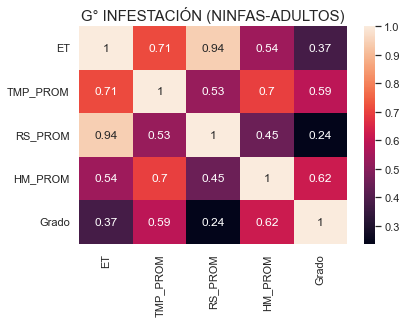

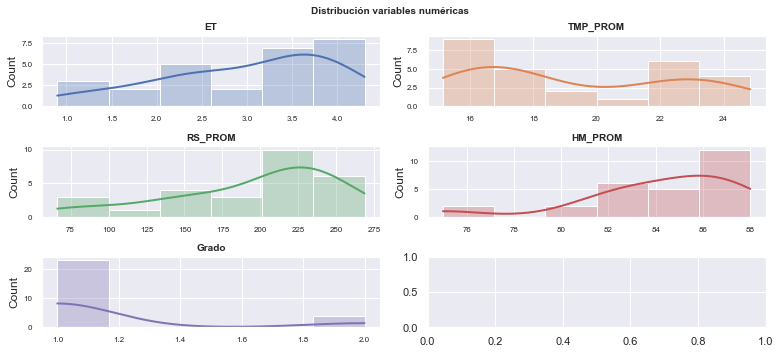

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1704
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      1
1   2020-01-16  4.200  22.833333    249.8     85.0      1
2   2020-01-21  3.900  23.514583    232.3     81.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      2
4   2020-02-05  4.200  22.829167    260.9     79.0      1
5   2020-02-13  3.100  21.835417    209.2     83.0      1
6   2020-02-17  4.400  23.135417    277.7     77.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-06  3.400  24.150000    195.4     75.0      2
9   2020-03-12  4.100  24.308333    237.6     78.0      2
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-04-04  4.100  22.191667    249.2     84.0      2
12  2020-

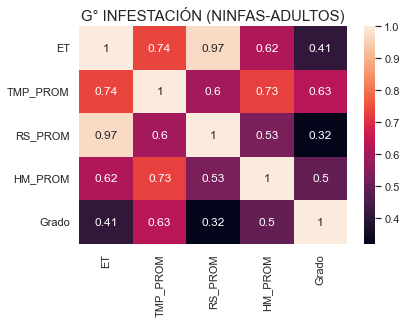

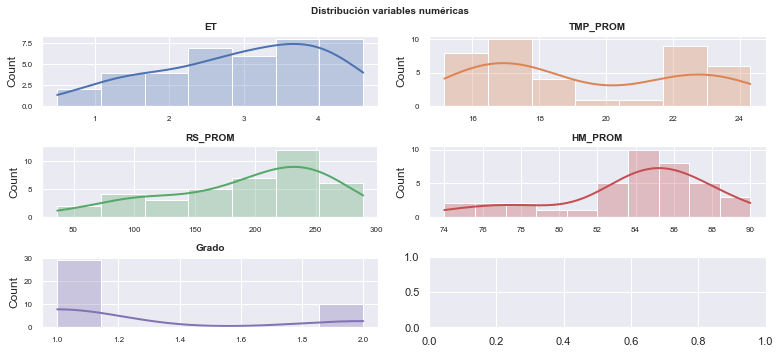

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1713
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      3
1   2020-01-16  4.200  22.833333    249.8     85.0      4
2   2020-01-21  3.900  23.514583    232.3     81.0      4
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-05  4.200  22.829167    260.9     79.0      4
5   2020-02-13  3.100  21.835417    209.2     83.0      2
6   2020-02-17  4.400  23.135417    277.7     77.0      3
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-07  3.700  24.062500    215.5     77.0      2
9   2020-03-13  4.300  22.522917    275.3     78.0      3
10  2020-03-16  3.700  23.541667    230.1     84.0      4
11  2020-03-27  3.700  23.245833    213.6     83

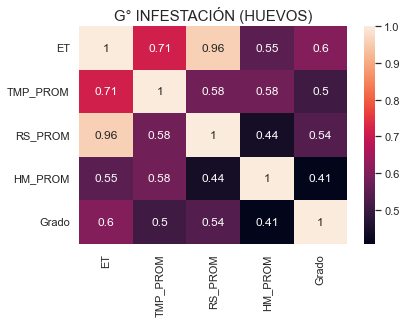

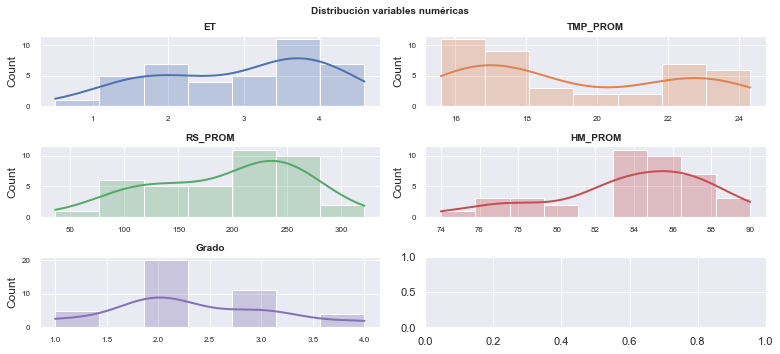

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1719
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      1
1   2020-01-16  4.200  22.833333    249.8     85.0      1
2   2020-01-21  3.900  23.514583    232.3     81.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      2
4   2020-02-05  4.200  22.829167    260.9     79.0      1
5   2020-02-13  3.100  21.835417    209.2     83.0      2
6   2020-02-17  4.400  23.135417    277.7     77.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-07  3.700  24.062500    215.5     77.0      2
9   2020-03-13  4.300  22.522917    275.3     78.0      3
10  2020-03-16  3.700  23.541667    230.1     84.0      1
11  2020-03-27  3.700  23.245833    213.6     83.0      2
12  2020-

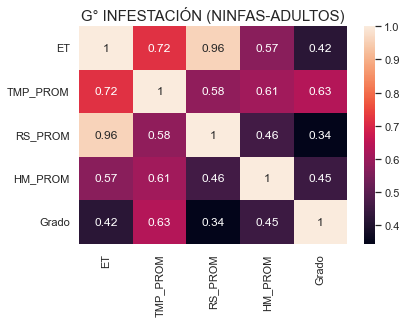

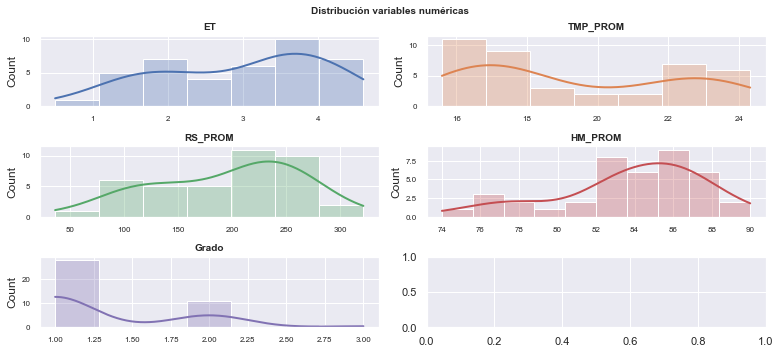

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1722
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      2
1   2020-01-16  4.200  22.833333    249.8     85.0      1
2   2020-01-21  3.900  23.514583    232.3     81.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      2
4   2020-02-05  4.200  22.829167    260.9     79.0      2
5   2020-02-13  3.100  21.835417    209.2     83.0      2
6   2020-02-17  4.400  23.135417    277.7     77.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-07  3.700  24.062500    215.5     77.0      2
9   2020-03-13  4.300  22.522917    275.3     78.0      2
10  2020-03-16  3.700  23.541667    230.1     84.0      1
11  2020-04-04  4.100  22.191667    249.2     84.0      3
12  2020-

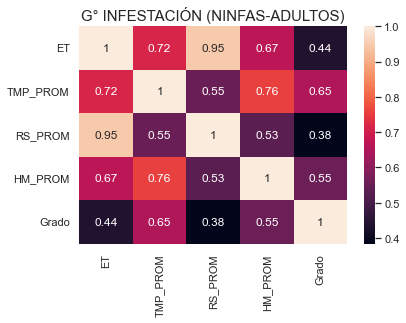

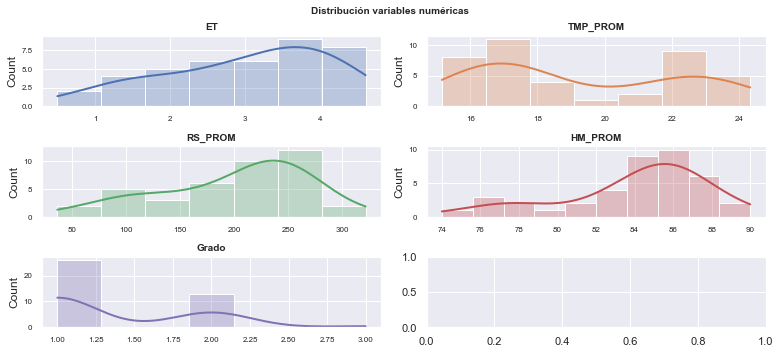

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1712
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      1
1   2020-01-16  4.200  22.833333    249.8     85.0      1
2   2020-01-21  3.900  23.514583    232.3     81.0      1
3   2020-01-30  4.600  22.941667    289.0     83.0      1
4   2020-02-05  4.200  22.829167    260.9     79.0      2
5   2020-02-13  3.100  21.835417    209.2     83.0      2
6   2020-02-17  4.400  23.135417    277.7     77.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      1
8   2020-03-07  3.700  24.062500    215.5     77.0      3
9   2020-03-12  4.100  24.308333    237.6     78.0      2
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-04-04  4.100  22.191667    249.2     84.0      3
12  2020-

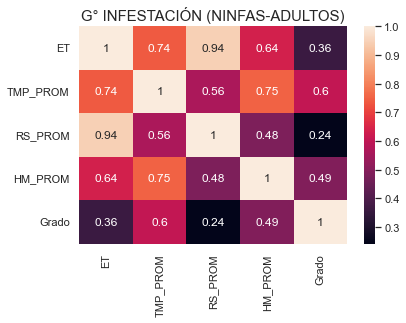

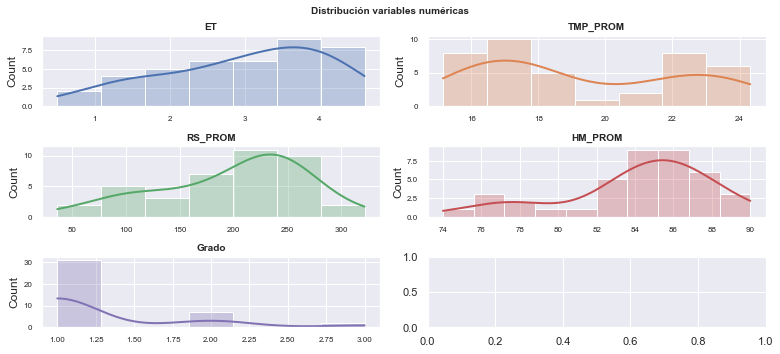

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1718
Plaga:  TRIPS TABACI
Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      2
1   2020-01-16  4.200  22.833333    249.8     85.0      2
2   2020-01-30  4.600  22.941667    289.0     83.0      2
3   2020-02-05  4.200  22.829167    260.9     79.0      1
4   2020-02-13  3.100  21.835417    209.2     83.0      1
5   2020-02-26  4.400  24.318750    260.5     76.0      1
6   2020-04-08  2.500  22.214583    156.3     83.0      1
7   2020-04-25  3.800  21.900000    232.1     78.0      1
8   2020-05-30  3.000  19.958333    213.3     86.0      1
9   2020-06-25  1.400  17.418750    101.4     84.0      1
10  2020-07-09  0.500  15.993750     36.5     90.0      2
11  2020-07-23  1.200  16.662500     85.9     88.0      2
12  2020-08

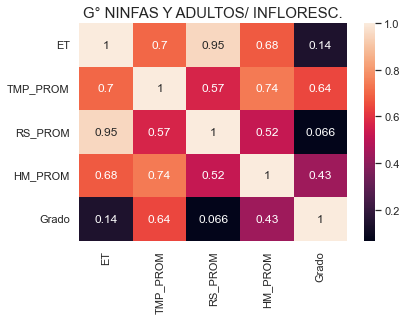

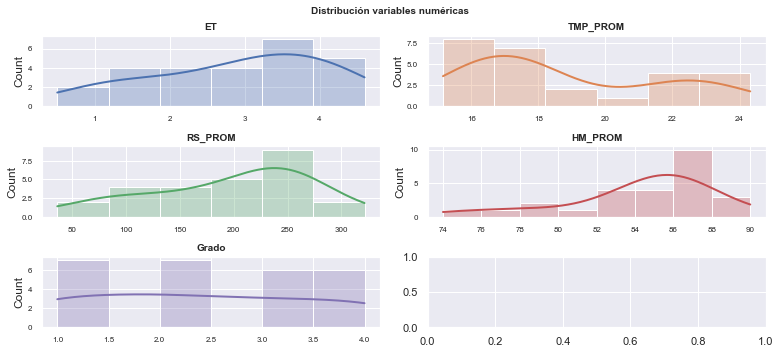

------------------------------------------------------------
Lugar: Filtrado 17 - Turno F17 - Lote 1702
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      1
1   2020-01-16  4.200  22.833333    249.8     85.0      1
2   2020-01-21  3.900  23.514583    232.3     81.0      1
3   2020-01-30  4.600  22.941667    289.0     83.0      2
4   2020-02-04  3.800  22.720833    239.9     83.0      2
5   2020-02-13  3.100  21.835417    209.2     83.0      1
6   2020-02-17  4.400  23.135417    277.7     77.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-07  3.700  24.062500    215.5     77.0      2
9   2020-03-12  4.100  24.308333    237.6     78.0      2
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-04-03  3.200  20.883333    212.5     80.0      2
12  2020-

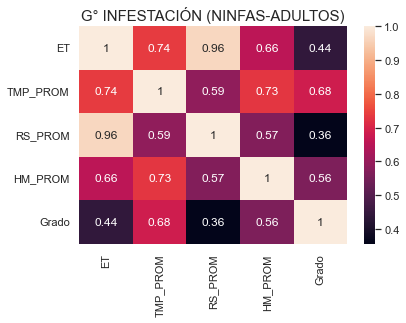

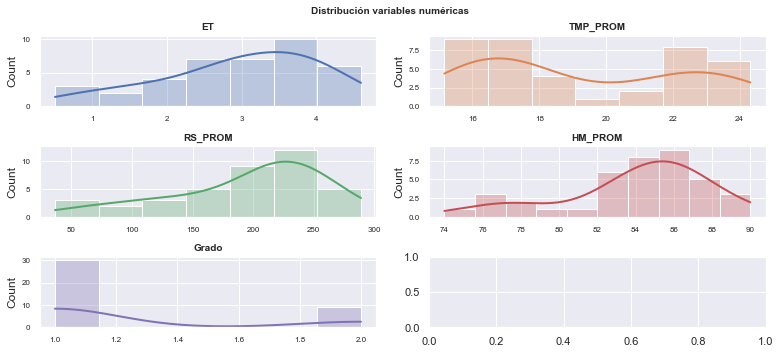

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2001
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-09  4.100  22.583333    257.7     86.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      4
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-31  3.800  22.764583    234.0     84.0      4
4   2020-02-07  4.200  22.733333    254.7     82.0      3
5   2020-02-13  3.100  21.835417    209.2     83.0      4
6   2020-06-06  2.700  18.379167    185.3     87.0      1
7   2020-06-13  1.200  17.400000     82.1     87.0      1
8   2020-06-19  2.800  17.095833    194.0     88.0      1
9   2020-06-27  2.200  16.835417    158.0     86.0      1
10  2020-07-03  2.400  15.825000    161.7     87.0      2
11  2020-07-10  1.200  15.943750     88.6     89

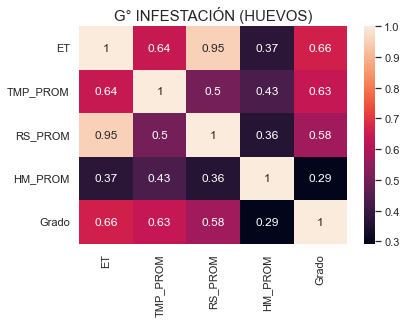

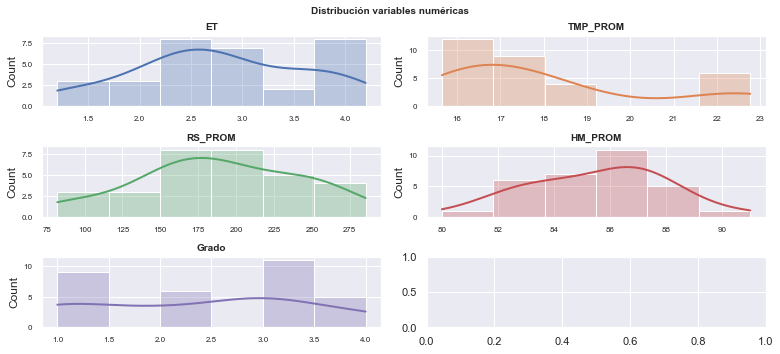

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2002
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-09  4.100  22.583333    257.7     86.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      5
2   2020-01-24  2.700  22.510417    149.1     84.0      2
3   2020-01-31  3.800  22.764583    234.0     84.0      4
4   2020-02-07  4.200  22.733333    254.7     82.0      3
5   2020-02-13  3.100  21.835417    209.2     83.0      4
6   2020-06-04  2.600  18.520833    173.4     88.0      1
7   2020-06-13  1.200  17.400000     82.1     87.0      1
8   2020-06-19  2.800  17.095833    194.0     88.0      1
9   2020-06-27  2.200  16.835417    158.0     86.0      1
10  2020-07-10  1.200  15.943750     88.6     89.0      1
11  2020-07-17  1.800  16.156250    131.6     88

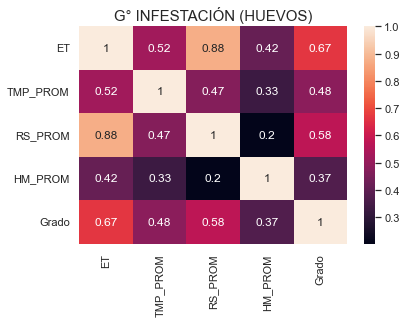

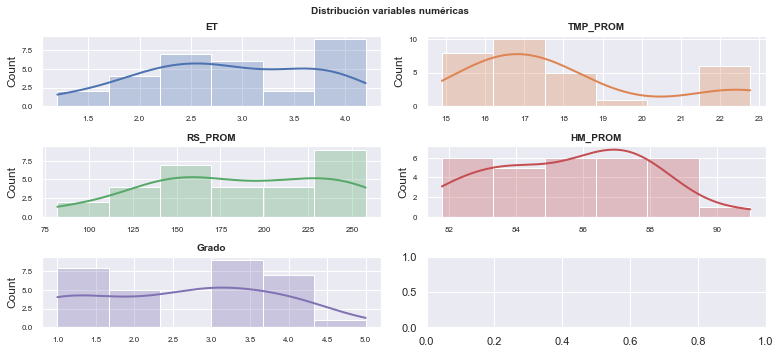

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      4
2   2020-01-24  2.700  22.510417    149.1     84.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-07  4.200  22.733333    254.7     82.0      2
5   2020-02-14  0.100  17.600000     38.3     81.0      2
6   2020-06-06  2.700  18.379167    185.3     87.0      1
7   2020-06-13  1.200  17.400000     82.1     87.0      1
8   2020-06-20  0.900  17.181250     63.7     88.0      1
9   2020-06-27  2.200  16.835417    158.0     86.0      1
10  2020-07-04  2.600  16.235417    183.0     88.0      1
11  2020-07-10  1.200  15.943750     88.

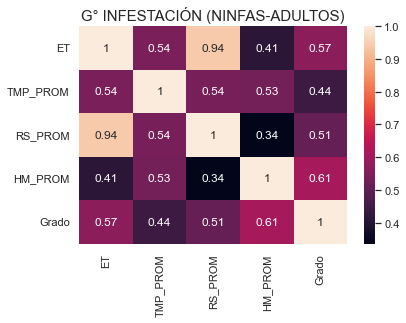

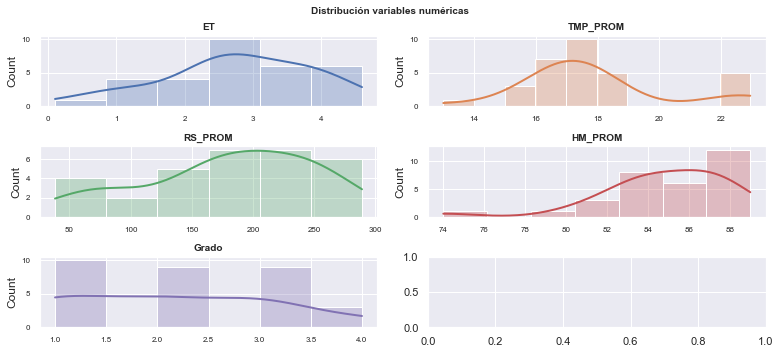

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2016
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      3
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-07  4.200  22.733333    254.7     82.0      2
5   2020-02-14  0.100  17.600000     38.3     81.0      3
6   2020-02-20  4.100  23.610417    250.1     81.0      4
7   2020-02-26  4.400  24.318750    260.5     76.0      3
8   2020-03-06  3.400  24.150000    195.4     75.0      4
9   2020-03-12  4.100  24.308333    237.6     78.0      4
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-03-26  3.900  23.489583    225.7     79

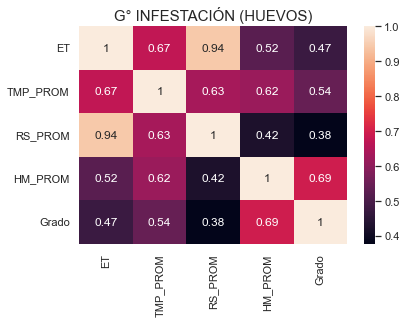

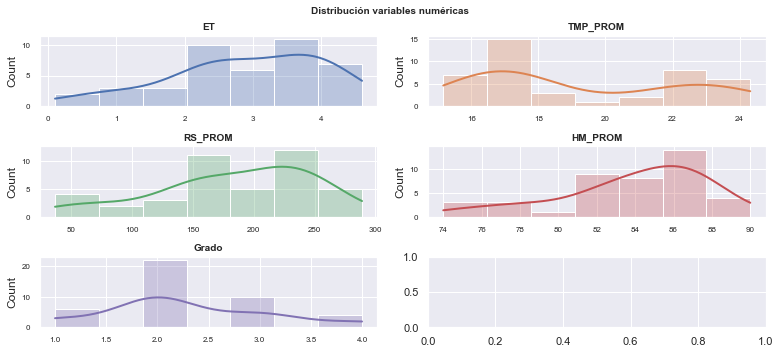

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2003
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-09  4.100  22.583333    257.7     86.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      5
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-31  3.800  22.764583    234.0     84.0      4
4   2020-02-07  4.200  22.733333    254.7     82.0      3
5   2020-02-14  0.100  17.600000     38.3     81.0      3
6   2020-06-06  2.700  18.379167    185.3     87.0      1
7   2020-06-12  1.300  16.966667     87.1     86.0      1
8   2020-06-19  2.800  17.095833    194.0     88.0      1
9   2020-06-27  2.200  16.835417    158.0     86.0      1
10  2020-07-03  2.400  15.825000    161.7     87.0      1
11  2020-07-10  1.200  15.943750     88.6     89

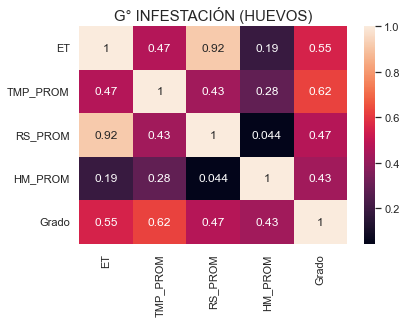

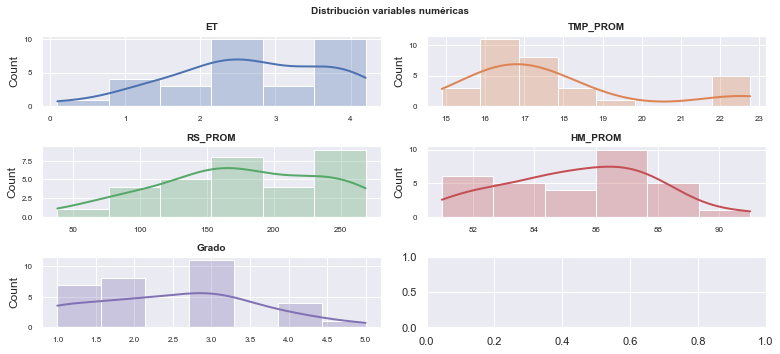

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2004
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-09  4.100  22.583333    257.7     86.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      5
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-31  3.800  22.764583    234.0     84.0      5
4   2020-02-07  4.200  22.733333    254.7     82.0      3
5   2020-02-14  0.100  17.600000     38.3     81.0      3
6   2020-06-05  2.600  18.387500    177.6     86.0      1
7   2020-06-12  1.300  16.966667     87.1     86.0      1
8   2020-06-19  2.800  17.095833    194.0     88.0      2
9   2020-06-27  2.200  16.835417    158.0     86.0      1
10  2020-07-10  1.200  15.943750     88.6     89.0      1
11  2020-07-17  1.800  16.156250    131.6     88

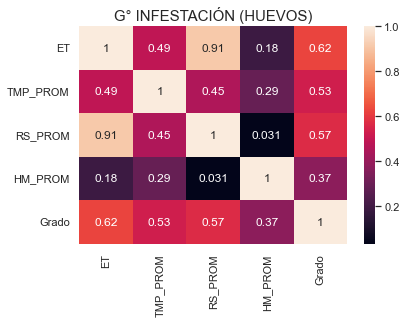

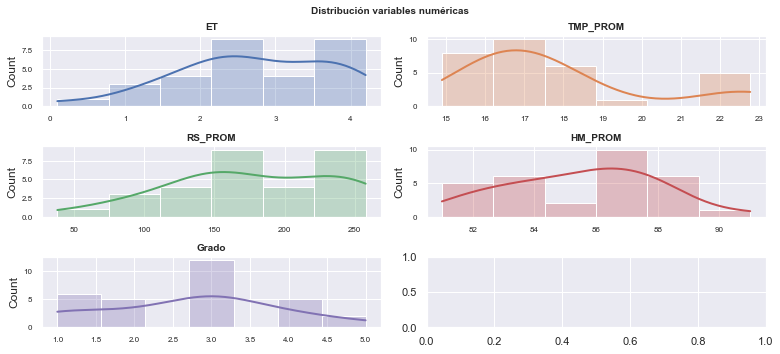

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2022
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      3
1   2020-01-17  3.800  22.116667    235.2     85.0      3
2   2020-01-24  2.700  22.510417    149.1     84.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-05  4.200  22.829167    260.9     79.0      2
5   2020-02-14  0.100  17.600000     38.3     81.0      2
6   2020-06-05  2.600  18.387500    177.6     86.0      1
7   2020-06-13  1.200  17.400000     82.1     87.0      1
8   2020-06-20  0.900  17.181250     63.7     88.0      1
9   2020-06-26  1.900  17.122917    137.1     85.0      1
10  2020-07-08  0.600  16.177083     42.7     88.0      1
11  2020-07-16  0.700  15.497917     53.

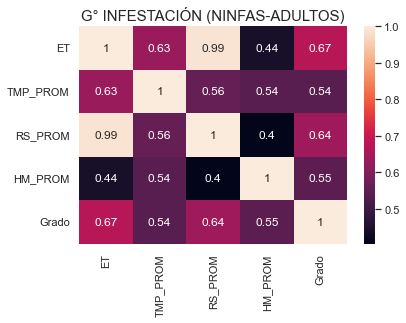

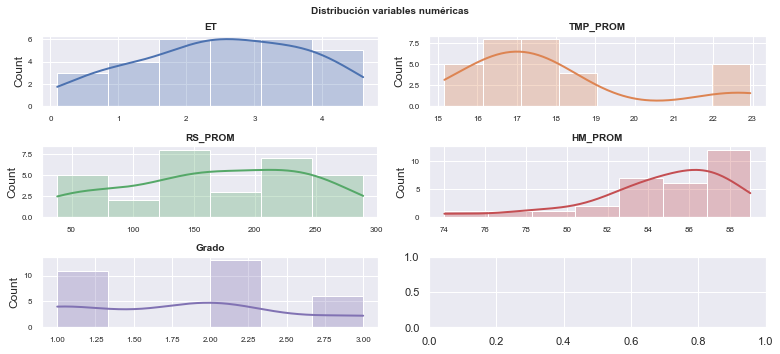

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2022
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      4
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-30  4.600  22.941667    289.0     83.0      4
4   2020-02-05  4.200  22.829167    260.9     79.0      3
5   2020-02-14  0.100  17.600000     38.3     81.0      3
6   2020-06-05  2.600  18.387500    177.6     86.0      2
7   2020-06-13  1.200  17.400000     82.1     87.0      1
8   2020-06-20  0.900  17.181250     63.7     88.0      1
9   2020-06-26  1.900  17.122917    137.1     85.0      1
10  2020-07-08  0.600  16.177083     42.7     88.0      1
11  2020-07-16  0.700  15.497917     53.5     87

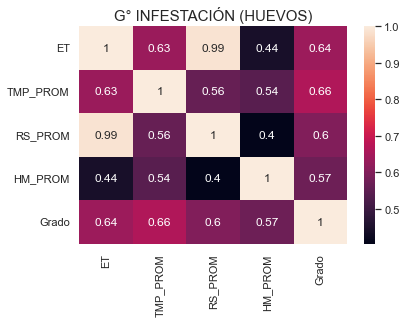

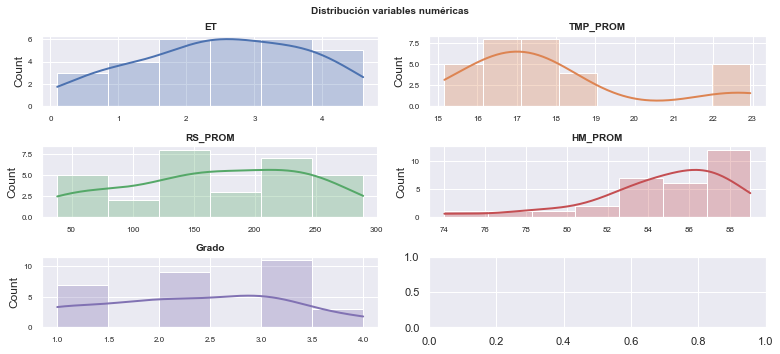

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2026
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      3
1   2020-01-17  3.800  22.116667    235.2     85.0      3
2   2020-01-24  2.700  22.510417    149.1     84.0      2
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-05  4.200  22.829167    260.9     79.0      2
5   2020-02-14  0.100  17.600000     38.3     81.0      2
6   2020-05-30  3.000  19.958333    213.3     86.0      1
7   2020-06-06  2.700  18.379167    185.3     87.0      1
8   2020-06-10  2.700  18.043750    172.3     89.0      1
9   2020-06-20  0.900  17.181250     63.7     88.0      1
10  2020-06-26  1.900  17.122917    137.1     85.0      1
11  2020-07-08  0.600  16.177083     42.

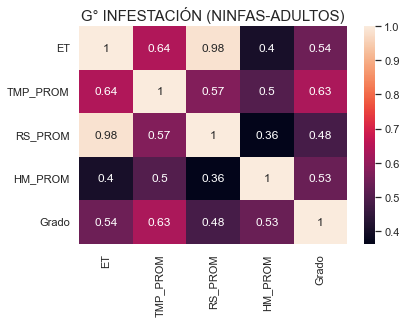

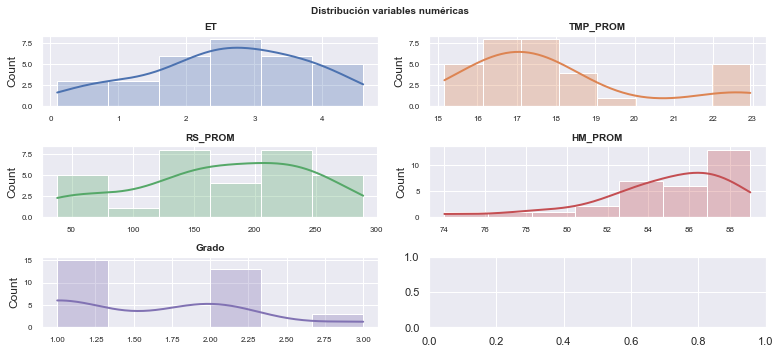

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2026
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      4
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-30  4.600  22.941667    289.0     83.0      4
4   2020-02-05  4.200  22.829167    260.9     79.0      3
5   2020-02-14  0.100  17.600000     38.3     81.0      3
6   2020-05-30  3.000  19.958333    213.3     86.0      1
7   2020-06-06  2.700  18.379167    185.3     87.0      1
8   2020-06-10  2.700  18.043750    172.3     89.0      1
9   2020-06-20  0.900  17.181250     63.7     88.0      1
10  2020-06-26  1.900  17.122917    137.1     85.0      1
11  2020-07-08  0.600  16.177083     42.7     88

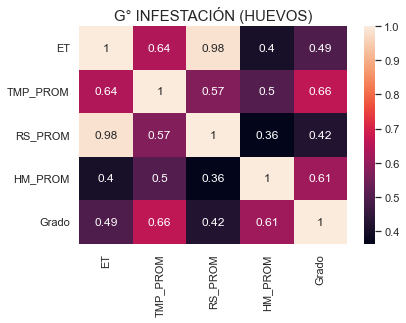

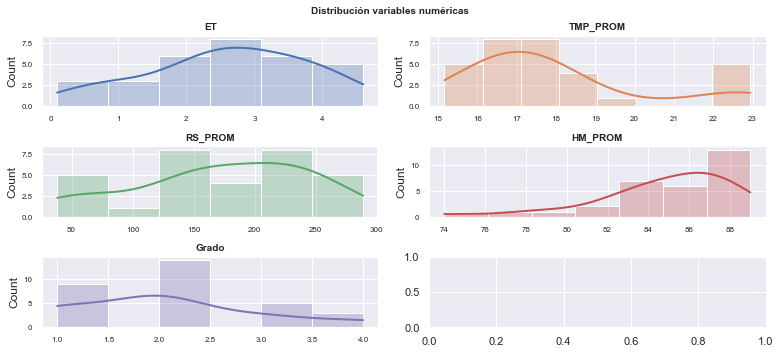

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2026
Plaga:  TRIPS TABACI
Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
------------------------------------------------------------
         Fecha    ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-02-14  0.10  17.600000     38.3     81.0      1
1   2020-07-22  2.80  17.247917    197.3     87.0      1
2   2020-08-13  2.20  16.102083    154.2     88.0      1
3   2020-09-11  0.90  15.160417     66.3     87.0      1
4   2020-09-24  2.90  16.587234    210.3     87.0      1
5   2020-10-01  3.50  17.758333    237.4     87.0      1
6   2020-10-13  2.10  17.018750    151.3     87.0      1
7   2020-10-23  1.40  16.666667     97.7     87.0      1
8   2020-11-07  3.76  17.070833    251.5     83.8      3
9   2020-11-23  3.90  18.297917    255.9     82.0      2
10  2020-12-10  2.50  17.175000    151.1     86.0      1
11  2020-12-17  3.90  18.308333    219.0     83.0      2


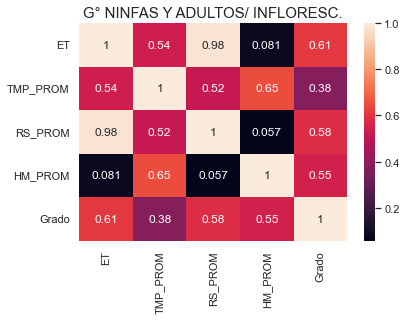

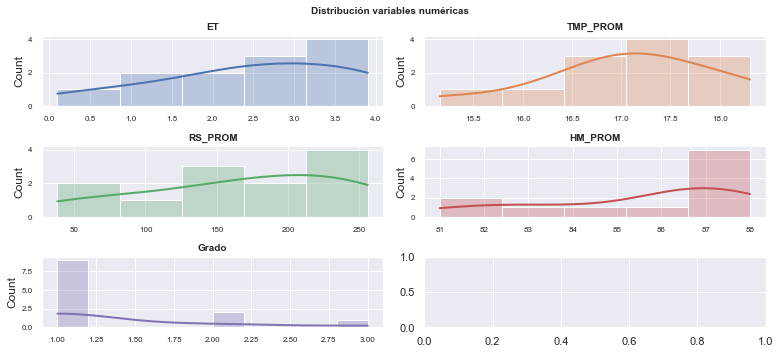

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2019
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      4
1   2020-01-17  3.800  22.116667    235.2     85.0      4
2   2020-01-24  2.700  22.510417    149.1     84.0      3
3   2020-01-30  4.600  22.941667    289.0     83.0      3
4   2020-02-05  4.200  22.829167    260.9     79.0      2
5   2020-02-14  0.100  17.600000     38.3     81.0      2
6   2020-02-20  4.100  23.610417    250.1     81.0      4
7   2020-02-26  4.400  24.318750    260.5     76.0      3
8   2020-03-06  3.400  24.150000    195.4     75.0      4
9   2020-03-12  4.100  24.308333    237.6     78.0      4
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-03-26  3.900  23.489583    225.7     79

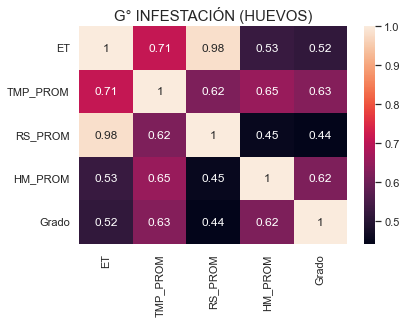

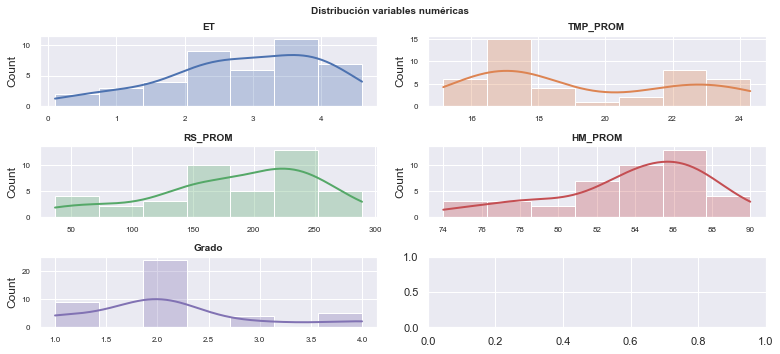

------------------------------------------------------------
Lugar: Filtrado 20 - Turno F20 - Lote 2019
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------
         Fecha     ET   TMP_PROM  RS_PROM  HM_PROM  Grado
0   2020-01-08  4.400  22.731250    262.3     74.0      1
1   2020-01-17  3.800  22.116667    235.2     85.0      1
2   2020-01-24  2.700  22.510417    149.1     84.0      1
3   2020-01-30  4.600  22.941667    289.0     83.0      1
4   2020-02-05  4.200  22.829167    260.9     79.0      1
5   2020-02-14  0.100  17.600000     38.3     81.0      1
6   2020-02-20  4.100  23.610417    250.1     81.0      2
7   2020-02-26  4.400  24.318750    260.5     76.0      2
8   2020-03-06  3.400  24.150000    195.4     75.0      2
9   2020-03-12  4.100  24.308333    237.6     78.0      1
10  2020-03-16  3.700  23.541667    230.1     84.0      2
11  2020-03-26  3.900  23.489583    225.7     79.0      2
12  2020-

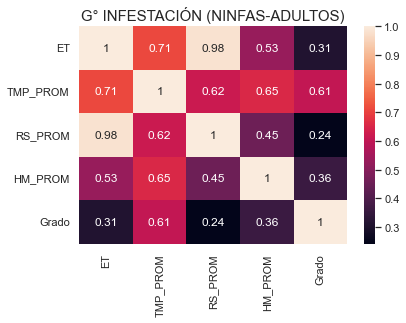

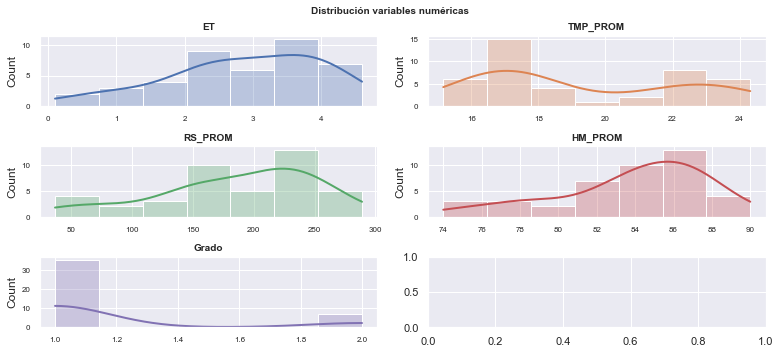

In [17]:
arrPlagas = []
dfFilter = dfFilEleg
arrFiltrados = dfFilEleg['Filtrado'].unique()
#dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                      
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)             
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                        arrPlagas.append(plaga + ' ' + caracteristica)
                        #Creando Mapa de Calor
                        sns.set()
                        
                        print('------------------------------------------------------------')
                        print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                        print('Plaga: ', plaga)
                        print('Caracteristica: ', caracteristica)      
                        
                        print('------------------------------------------------------------')
                        
                        print(df_union)
                        
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                        #plt.show()
                        
                        # Gráfico de distribución para cada variable numérica
                        # ==============================================================================
                        # Ajustar número de subplots en función del número de columnas

                        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 5))
                        axes = axes.flat
                        columnas_numeric = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']].select_dtypes(include=['float64', 'int']).columns

                        for i, colum in enumerate(columnas_numeric):
                            sns.histplot(
                                data    = df_union[['ET','TMP_PROM','RS_PROM','HM_PROM','Grado']],
                                x       = colum,
                                stat    = "count",
                                kde     = True,
                                color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                                line_kws= {'linewidth': 2},
                                alpha   = 0.3,
                                ax      = axes[i]
                            )
                            axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
                            axes[i].tick_params(labelsize = 8)
                            axes[i].set_xlabel("")



                        fig.tight_layout()
                        plt.subplots_adjust(top = 0.9)
                        fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

                        plt.show()
                        
                        

In [18]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  27
Variables X: ['HM_PROM']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     11.66
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00291
Time:                        11:39:25   Log-Likelihood:                0.96644
No. Observations:                  21   AIC:                             2.067
Df Residuals:                      19   BIC:                             4.156
Df Model:                           1                                         
Cova

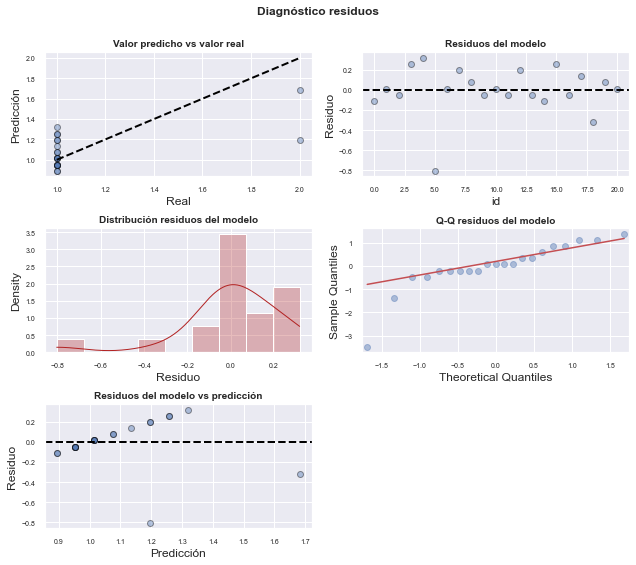


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  0.892857  0.079523       0.726414       1.059300      0.357819   
1   1.014286  0.058075       0.892733       1.135838      0.491468   
23  0.953571  0.067321       0.812667       1.094475      0.425919   
5   1.257143  0.071127       1.108272       1.406014      0.727307   

    obs_ci_upper  
13      1.427896  
1       1.537103  
23      1.481224  
5       1.786978  

El error (rmse) de test es: 0.4073125168645789
x_test
    const  HM_PROM
18    1.0     87.0
7     1.0     75.0
4     1.0     84.0
3     1.0     81.0
25    1.0     83.0
2     1.0     85.0

 y_test
[[1]
 [2]
 [2]
 [1]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1704
Plaga:  BEMISIA TABACI
Car

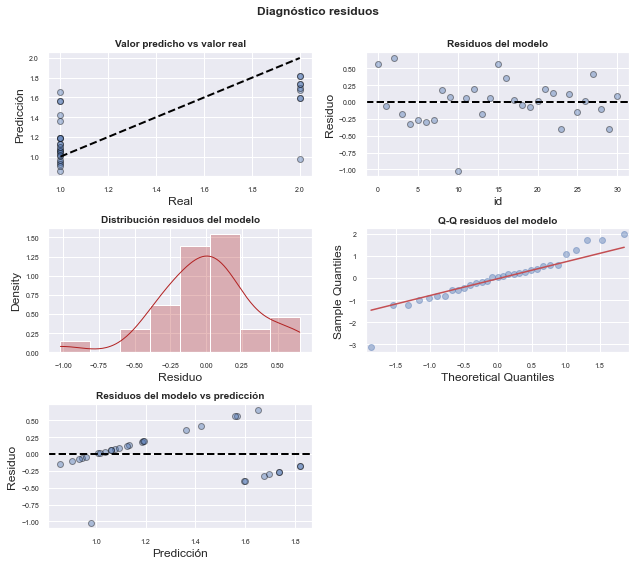


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  1.566386  0.081118       1.400480       1.732291      0.853285   
21  0.945005  0.090561       0.759788       1.130222      0.227166   
0   1.653839  0.093205       1.463213       1.844465      0.934586   
7   1.820856  0.119633       1.576178       2.065533      1.085427   

    obs_ci_upper  
13      2.279486  
21      1.662844  
0       2.373093  
7       2.556284  

El error (rmse) de test es: 0.40339260598082244
x_test
    const   TMP_PROM
8     1.0  24.150000
38    1.0  15.604762
14    1.0  21.900000
1     1.0  22.833333
4     1.0  22.829167
31    1.0  17.143750
20    1.0  15.710417
17    1.0  18.387500

 y_test
[[2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lu

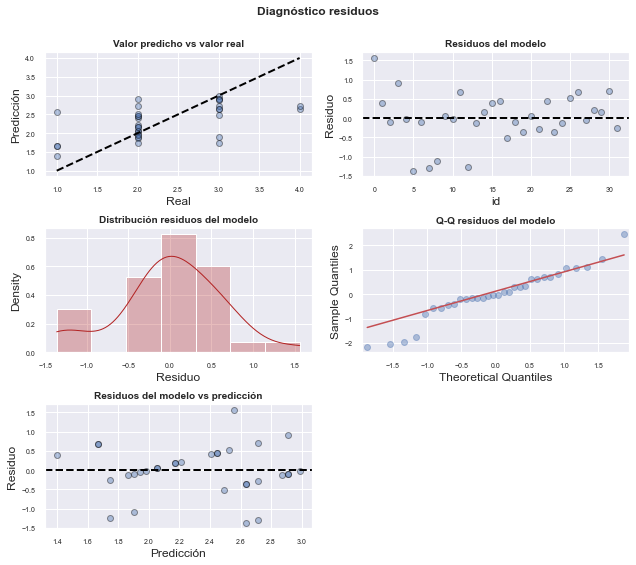


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  2.560413  0.132714       2.289376       2.831450      1.200057   
21  1.397981  0.267959       0.850736       1.945225     -0.043055   
0   2.909143  0.195472       2.509936       3.308349      1.517570   
7   2.909143  0.195472       2.509936       3.308349      1.517570   

    obs_ci_upper  
13      3.920769  
21      2.839016  
0       4.300715  
7       4.300715  

El error (rmse) de test es: 0.7597754227891069
x_test
    const   ET
8     1.0  3.7
39    1.0  3.6
14    1.0  3.6
1     1.0  4.2
4     1.0  4.2
31    1.0  3.6
20    1.0  1.4
17    1.0  2.6

 y_test
[[2]
 [3]
 [2]
 [4]
 [4]
 [2]
 [1]
 [2]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1719
Plaga:  BEMISI

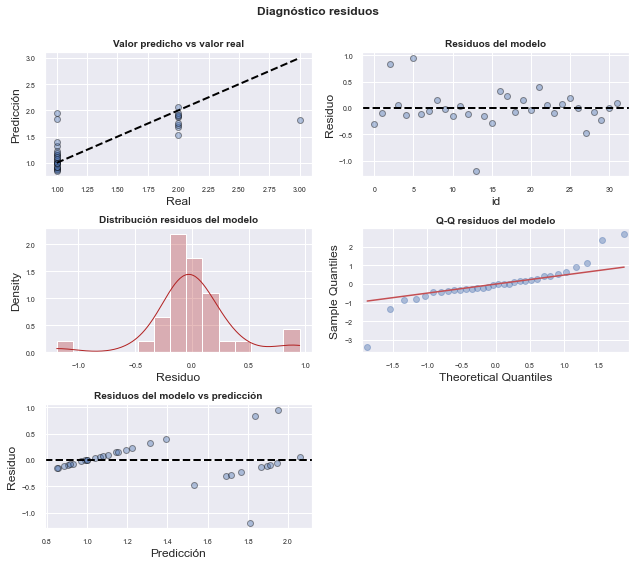


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  1.692103  0.085303       1.517890       1.866316      0.925929   
21  0.906664  0.095186       0.712268       1.101060      0.135650   
0   1.837790  0.102067       1.629341       2.046238      1.063113   
7   2.057183  0.131141       1.789358       2.325007      1.264464   

    obs_ci_upper  
13      2.458277  
21      1.677678  
0       2.612466  
7       2.849901  

El error (rmse) de test es: 0.5851284170499824
x_test
    const   TMP_PROM
8     1.0  24.062500
39    1.0  17.458333
14    1.0  20.816667
1     1.0  22.833333
4     1.0  22.829167
31    1.0  17.141667
20    1.0  15.710417
17    1.0  18.387500

 y_test
[[2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lug

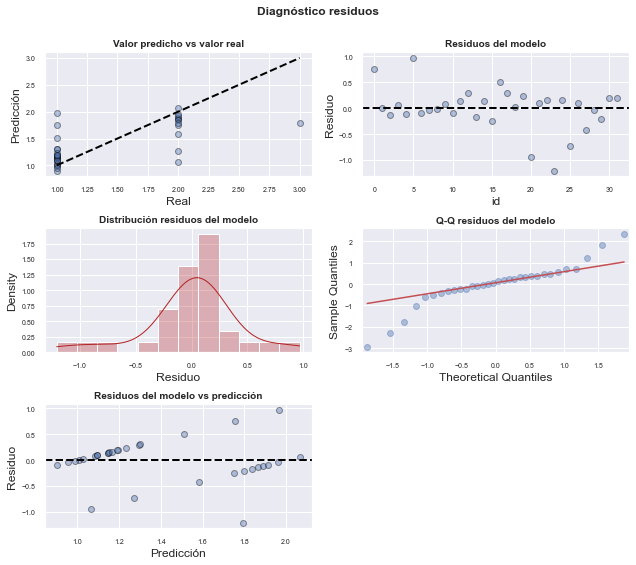


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  1.757838  0.103931       1.545583       1.970093      0.865158   
21  1.006683  0.110944       0.780105       1.233260      0.110489   
0   1.863557  0.119905       1.618678       2.108435      0.962562   
7   2.065455  0.154281       1.750371       2.380538      1.142902   

    obs_ci_upper  
13      2.650519  
21      1.902876  
0       2.764551  
7       2.988007  

El error (rmse) de test es: 0.40187799341694863
x_test
    const   TMP_PROM
8     1.0  24.062500
39    1.0  15.604762
14    1.0  20.816667
1     1.0  22.833333
4     1.0  22.829167
31    1.0  17.141667
20    1.0  15.710417
17    1.0  18.387500

 y_test
[[2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lu

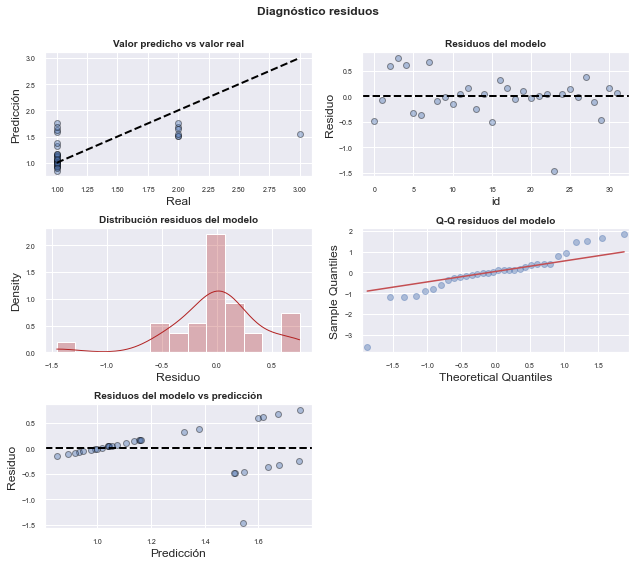


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  1.514374  0.100119       1.309904       1.718843      0.633506   
21  0.930704  0.109993       0.706069       1.155339      0.044937   
0   1.596520  0.115202       1.361247       1.831794      0.707996   
7   1.753401  0.147989       1.451167       2.055634      0.844849   

    obs_ci_upper  
13      2.395242  
21      1.816470  
0       2.485044  
7       2.661953  

El error (rmse) de test es: 0.5448923920937584
x_test
    const   TMP_PROM
8     1.0  24.062500
39    1.0  15.604762
14    1.0  20.931250
1     1.0  22.833333
4     1.0  22.829167
31    1.0  17.712500
20    1.0  15.710417
17    1.0  18.387500

 y_test
[[3]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lug

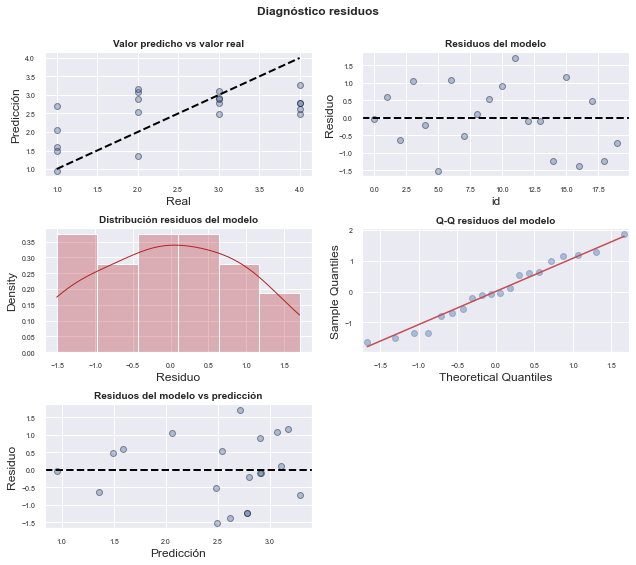


 Predicciones:
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
5  0.954054  0.559775      -0.221989       2.130097     -1.386299   
4  1.585564  0.373879       0.800073       2.371054     -0.584960   
0  1.357754  0.438318       0.436881       2.278627     -0.865348   
8  2.062905  0.260231       1.516180       2.609629     -0.033064   

   obs_ci_upper  
5      3.294407  
4      3.756087  
0      3.580856  
8      4.158873  

El error (rmse) de test es: 0.6486466120792844
x_test
    const   TMP_PROM
7     1.0  21.900000
16    1.0  16.462500
2     1.0  22.941667
3     1.0  22.829167
1     1.0  22.833333
18    1.0  17.241667

 y_test
[[1]
 [4]
 [2]
 [1]
 [2]
 [3]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1702
Plaga:  BEMISIA TABACI

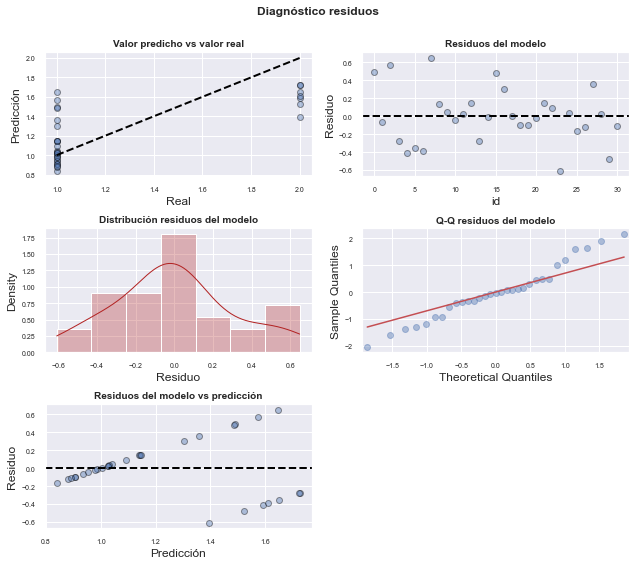


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  1.491261  0.075243       1.337371       1.645151      0.839229   
21  0.935807  0.078473       0.775312       1.096302      0.282185   
0   1.571647  0.086317       1.395108       1.748186      0.913902   
7   1.725168  0.110340       1.499497       1.950839      1.052568   

    obs_ci_upper  
13      2.143293  
21      1.589429  
0       2.229393  
7       2.397768  

El error (rmse) de test es: 0.33499519535570477
x_test
    const   TMP_PROM
8     1.0  24.062500
38    1.0  15.604762
14    1.0  21.900000
1     1.0  22.833333
4     1.0  22.720833
31    1.0  17.143750
20    1.0  15.993750
17    1.0  18.387500

 y_test
[[2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lu

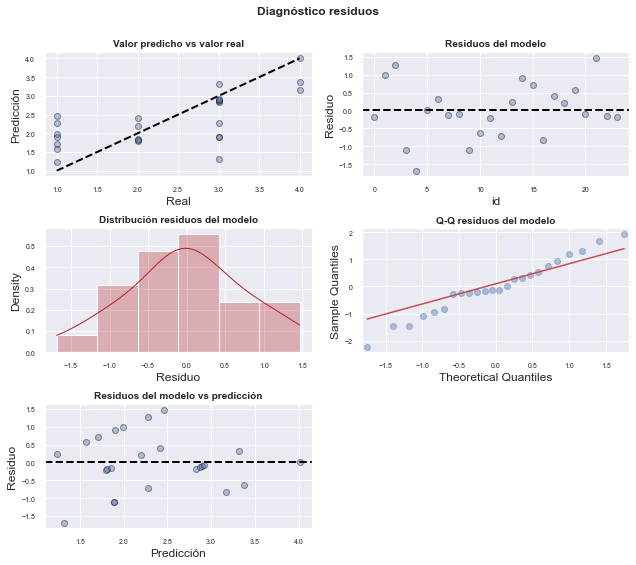


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  2.829064  0.319403       2.164829       3.493298      1.013804   
14  1.992526  0.216399       1.542499       2.442553      0.244246   
13  2.282978  0.182680       1.903073       2.662883      0.551422   
22  1.895061  0.209384       1.459625       2.330498      0.150480   

    obs_ci_upper  
23      4.644323  
14      3.740807  
13      4.014534  
22      3.639643  

El error (rmse) de test es: 0.7296404739282641
x_test
    const   ET   TMP_PROM
7     1.0  1.2  17.400000
10    1.0  2.4  15.825000
4     1.0  4.2  22.733333
1     1.0  3.8  22.116667
29    1.0  3.3  15.854167
8     1.0  2.8  17.095833
3     1.0  3.8  22.764583

 y_test
[[1]
 [2]
 [3]
 [4]
 [3]
 [1]
 [4]]



**********************************************************************************************************************
************************************************************************************************************

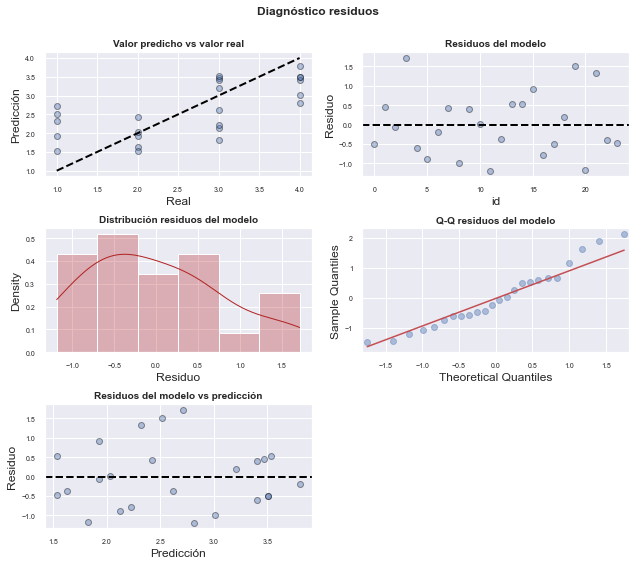


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
3   3.503934  0.273078       2.937605       4.070264      1.671329   
23  3.464531  0.265734       2.913432       4.015631      1.636575   
14  1.927812  0.240484       1.429079       2.426545      0.114956   
13  2.715873  0.172949       2.357200       3.074547      0.936446   

    obs_ci_upper  
3       5.336540  
23      5.292488  
14      3.740669  
13      4.495300  

El error (rmse) de test es: 1.1912583972280801
x_test
    const   ET
7     1.0  1.2
10    1.0  1.2
4     1.0  4.2
1     1.0  3.8
28    1.0  2.5
8     1.0  2.8

 y_test
[[1]
 [1]
 [3]
 [5]
 [4]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - Lote 2015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Cara

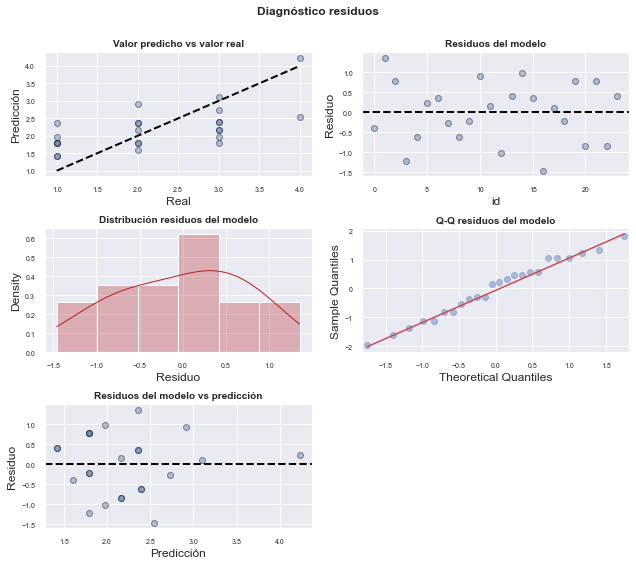


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  1.603315  0.224928       1.136843       2.069786     -0.073952   
14  2.353725  0.163142       2.015389       2.692062      0.707488   
13  1.790918  0.193024       1.390610       2.191225      0.130835   
22  1.790918  0.193024       1.390610       2.191225      0.130835   

    obs_ci_upper  
23      3.280581  
14      3.999963  
13      3.451000  
22      3.451000  

El error (rmse) de test es: 0.9064364939454201
x_test
    const  HM_PROM
7     1.0     87.0
10    1.0     88.0
4     1.0     82.0
1     1.0     85.0
29    1.0     83.0
8     1.0     88.0
3     1.0     83.0

 y_test
[[1]
 [1]
 [2]
 [4]
 [2]
 [1]
 [3]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - Lote 2016
Pl

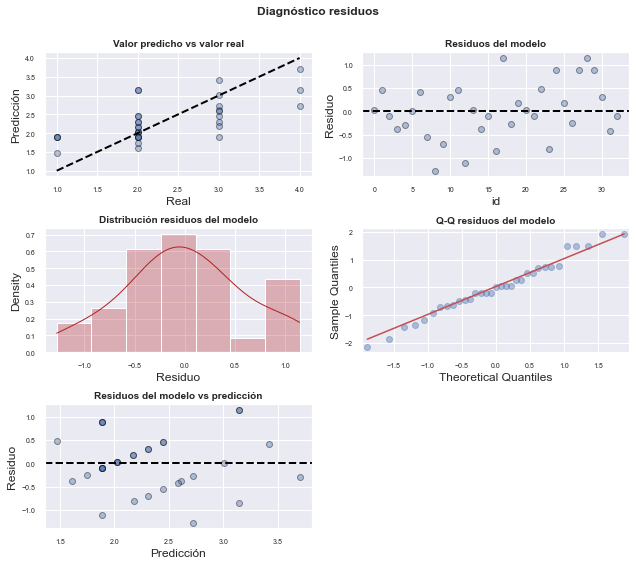


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
21  2.028050  0.123721       1.775719       2.280381      0.743110   
13  2.446073  0.109885       2.221961       2.670185      1.166375   
14  1.888709  0.139654       1.603884       2.173535      0.596995   
25  1.610028  0.180482       1.241932       1.978123      0.297436   

    obs_ci_upper  
21      3.312991  
13      3.725771  
14      3.180424  
25      2.922619  

El error (rmse) de test es: 0.5919386127302938
x_test
    const  HM_PROM
10    1.0     84.0
41    1.0     83.0
8     1.0     75.0
17    1.0     86.0
36    1.0     86.0
1     1.0     85.0
4     1.0     82.0
20    1.0     88.0
29    1.0     87.0

 y_test
[[2]
 [2]
 [4]
 [1]
 [2]
 [3]
 [2]
 [1]
 [2]]



**********************************************************************************************************************
********************************************************************************************************************

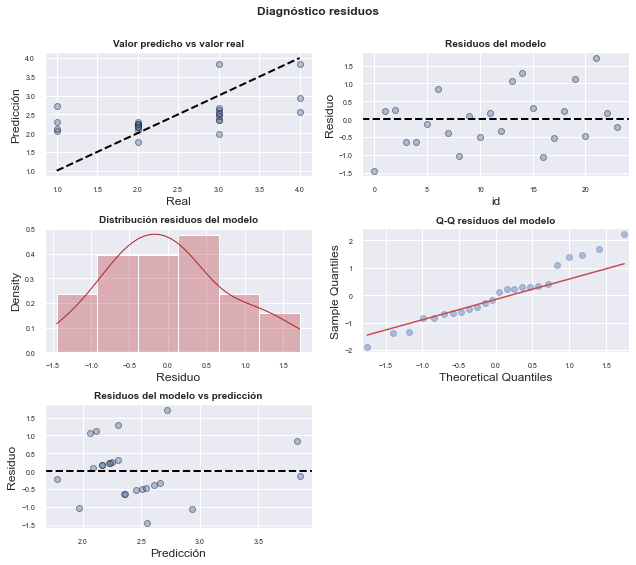


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  2.552084  0.167222       2.205286       2.898881      0.847959   
14  2.225480  0.181948       1.848143       2.602817      0.514879   
13  2.251946  0.178296       1.882183       2.621709      0.543000   
22  2.348238  0.168346       1.999110       2.697366      0.643637   

    obs_ci_upper  
23      4.256209  
14      3.936081  
13      3.960893  
22      4.052839  

El error (rmse) de test es: 1.0618753002618846
x_test
    const   TMP_PROM
7     1.0  16.966667
10    1.0  15.825000
4     1.0  22.733333
1     1.0  22.116667
29    1.0  16.210417
8     1.0  17.095833
3     1.0  22.764583

 y_test
[[1]
 [1]
 [3]
 [5]
 [3]
 [1]
 [4]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F2

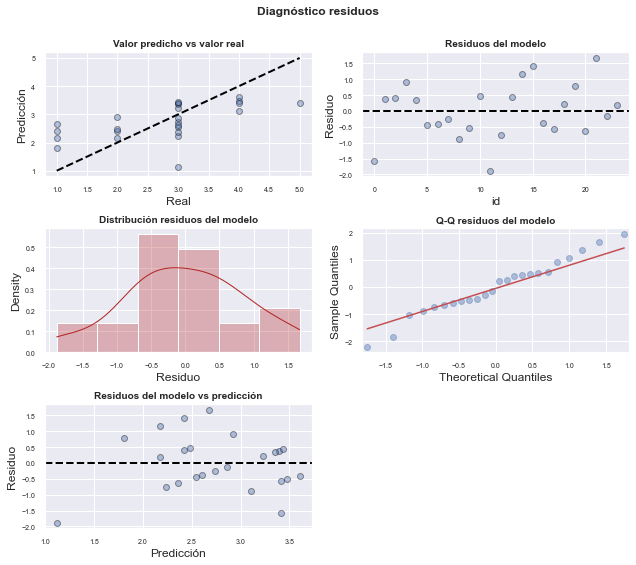


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
3   3.418613  0.272852       2.852752       3.984474      1.473952   
23  3.393748  0.267323       2.839353       3.948142      1.452392   
14  2.424008  0.207991       1.992660       2.855355      0.514147   
13  2.921310  0.190316       2.526619       3.316002      1.019393   

    obs_ci_upper  
3       5.363274  
23      5.335104  
14      4.333869  
13      4.823228  

El error (rmse) de test es: 1.0726274476887783
x_test
    const   ET
7     1.0  1.3
10    1.0  1.2
4     1.0  4.2
1     1.0  3.8
28    1.0  2.5
8     1.0  2.8

 y_test
[[1]
 [1]
 [3]
 [5]
 [4]
 [2]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - Lote 2022
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Cara

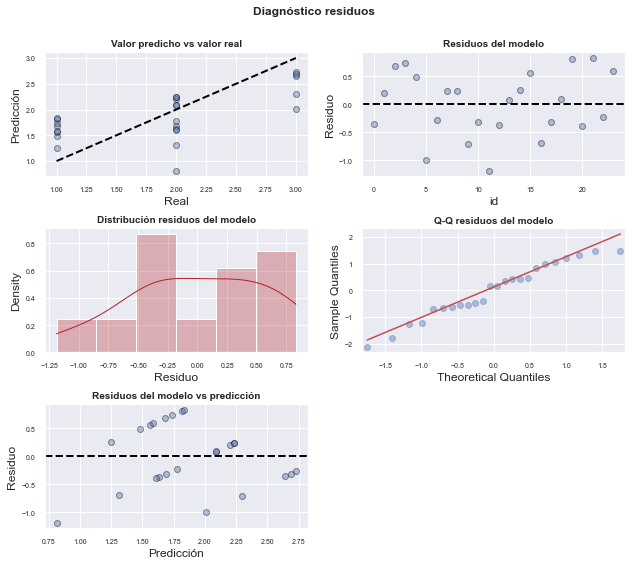


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
3   2.643507  0.245768       2.132404       3.154610      1.293191   
23  2.202301  0.202401       1.781386       2.623217      0.883478   
14  1.678872  0.134226       1.399732       1.958011      0.398230   
13  1.738992  0.148101       1.430999       2.046984      0.451753   

    obs_ci_upper  
3       3.993822  
23      3.521125  
14      2.959514  
13      3.026231  

El error (rmse) de test es: 0.41325905121247003
x_test
    const   ET  RS_PROM
7     1.0  1.2     82.1
10    1.0  0.6     42.7
4     1.0  4.2    260.9
1     1.0  3.8    235.2
28    1.0  2.5    151.1
8     1.0  0.9     63.7

 y_test
[[1]
 [1]
 [2]
 [3]
 [2]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - 

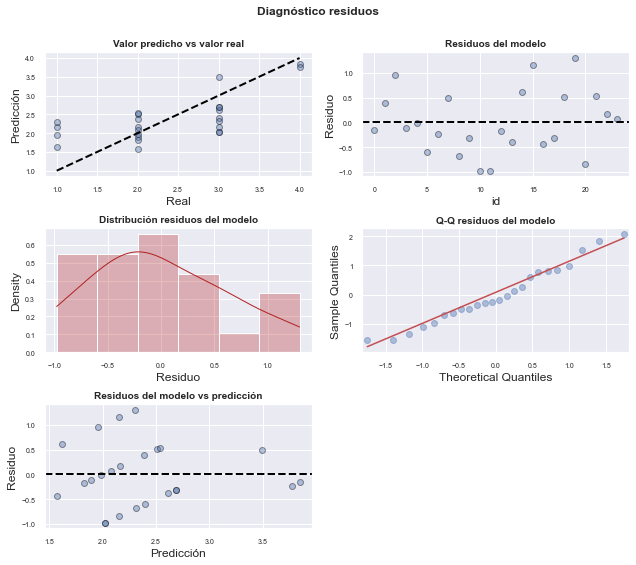


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
3   3.846144  0.369966       3.076759       4.615530      2.256853   
23  2.386520  0.242317       1.882593       2.890446      0.907387   
14  1.958098  0.170375       1.603784       2.312412      0.523027   
13  1.895260  0.203340       1.472390       2.318129      0.441743   

    obs_ci_upper  
3       5.435436  
23      3.865652  
14      3.393170  
13      3.348776  

El error (rmse) de test es: 0.8446052064432221
x_test
    const   ET   TMP_PROM
7     1.0  1.2  17.400000
10    1.0  0.6  16.177083
4     1.0  4.2  22.829167
1     1.0  3.8  22.116667
28    1.0  2.5  17.175000
8     1.0  0.9  17.181250

 y_test
[[1]
 [1]
 [3]
 [4]
 [3]
 [1]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 -

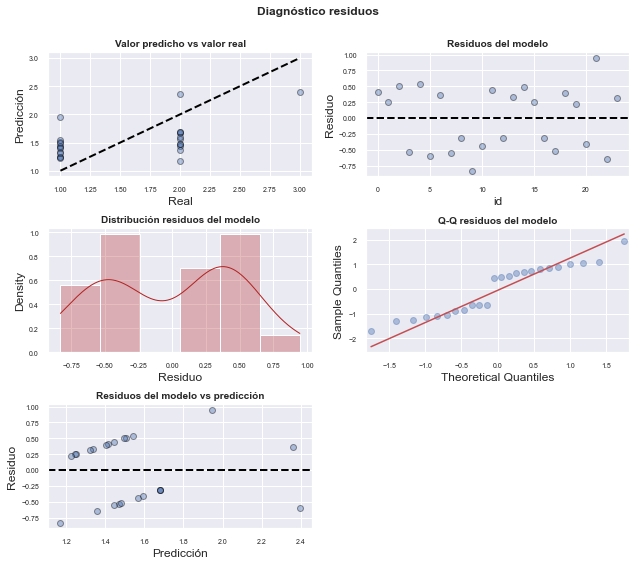


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  1.413781  0.113022       1.179387       1.648175      0.329444   
14  1.250197  0.144252       0.951037       1.549357      0.150042   
13  1.507884  0.104844       1.290451       1.725316      0.427087   
22  1.470782  0.106991       1.248897       1.692667      0.389081   

    obs_ci_upper  
23      2.498117  
14      2.350352  
13      2.588680  
22      2.552484  

El error (rmse) de test es: 0.5812169745296687
x_test
    const   TMP_PROM
7     1.0  18.379167
10    1.0  17.122917
4     1.0  22.829167
1     1.0  22.116667
29    1.0  17.175000
8     1.0  18.043750
3     1.0  22.941667

 y_test
[[1]
 [1]
 [2]
 [3]
 [2]
 [1]
 [3]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F2

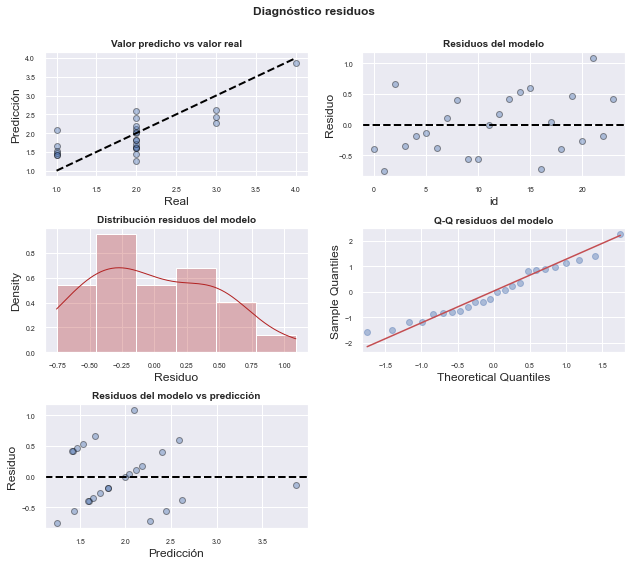


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
23  1.603125  0.124912       1.343356       1.862895      0.503815   
14  1.246036  0.170442       0.891583       1.600490      0.120585   
13  1.667381  0.127311       1.402622       1.932139      0.566881   
22  1.642047  0.125009       1.382077       1.902017      0.542689   

    obs_ci_upper  
23      2.702436  
14      2.371488  
13      2.767881  
22      2.741405  

El error (rmse) de test es: 1.0085137809459346
x_test
    const   TMP_PROM  HM_PROM
7     1.0  18.379167     87.0
10    1.0  17.122917     85.0
4     1.0  22.829167     79.0
1     1.0  22.116667     85.0
29    1.0  17.175000     86.0
8     1.0  18.043750     89.0
3     1.0  22.941667     83.0

 y_test
[[1]
 [1]
 [3]
 [4]
 [3]
 [1]
 [4]]



**********************************************************************************************************************
****************************************************************************

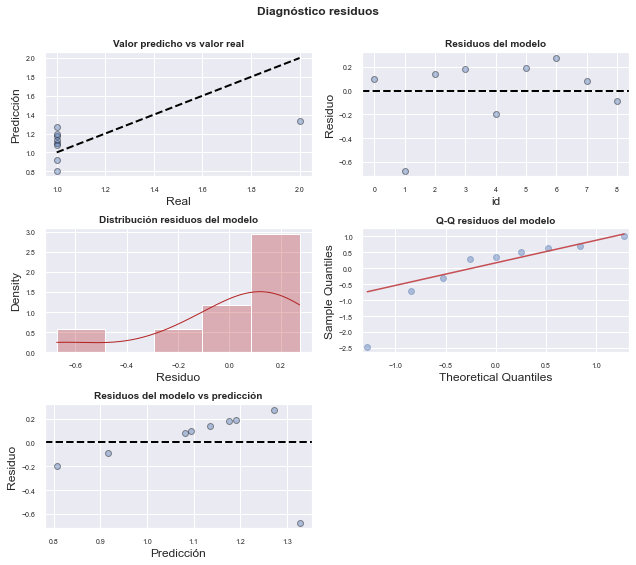


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
2   1.094336  0.103908       0.848633       1.340039      0.321408   
9   1.327663  0.177402       0.908174       1.747152      0.483258   
10  1.135511  0.104576       0.888229       1.382794      0.362079   
1   1.176687  0.112157       0.911477       1.441897      0.397338   

    obs_ci_upper  
2       1.867264  
9       2.172067  
10      1.908943  
1       1.956036  

El error (rmse) de test es: 1.050971858034426
x_test
    const    ET
7     1.0  1.40
8     1.0  3.76
11    1.0  3.90

 y_test
[[1]
 [3]
 [2]]



**********************************************************************************************************************
**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - Lote 2019
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  42

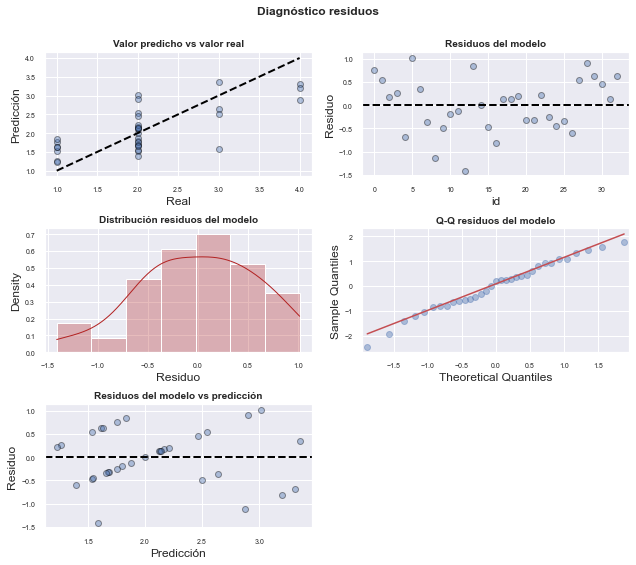


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
21  1.759846  0.128255       1.497914       2.021778      0.493842   
13  2.545469  0.168758       2.200819       2.890118      1.259802   
14  2.166052  0.238836       1.678283       2.653821      0.834859   
25  1.265622  0.182598       0.892706       1.638538     -0.027909   

    obs_ci_upper  
21      3.025849  
13      3.831136  
14      3.497245  
25      2.559153  

El error (rmse) de test es: 0.8226545978106988
x_test
    const   TMP_PROM  HM_PROM
10    1.0  23.541667     84.0
41    1.0  18.308333     83.0
8     1.0  24.150000     75.0
17    1.0  19.958333     86.0
36    1.0  17.458333     86.0
1     1.0  22.116667     85.0
4     1.0  22.829167     79.0
20    1.0  17.181250     88.0
29    1.0  15.160417     87.0

 y_test
[[2]
 [2]
 [4]
 [1]
 [2]
 [4]
 [2]
 [1]
 [2]]



**********************************************************************************************************************
******

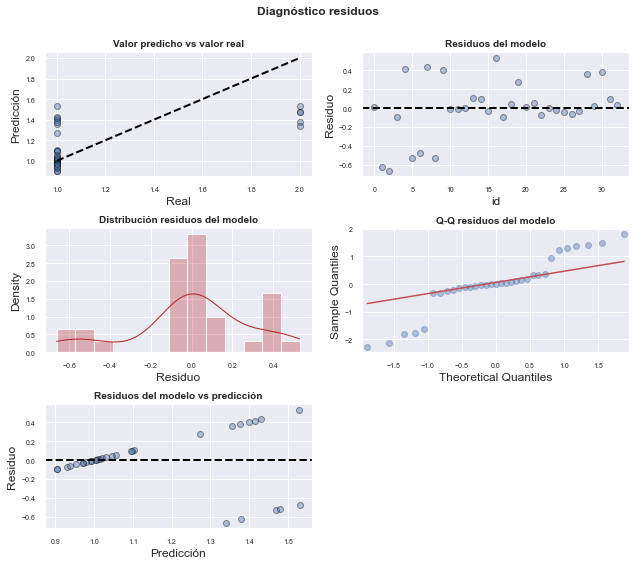


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
21  1.011467  0.063038       0.882901       1.140033      0.384777   
13  1.378206  0.077274       1.220604       1.535808      0.744922   
14  1.339492  0.070442       1.195824       1.483159      0.709530   
25  0.905827  0.080842       0.740948       1.070706      0.270693   

    obs_ci_upper  
21      1.638157  
13      2.011491  
14      1.969453  
25      1.540962  

El error (rmse) de test es: 0.3162493652748357
x_test
    const   TMP_PROM
10    1.0  23.541667
41    1.0  18.308333
8     1.0  24.150000
17    1.0  19.958333
36    1.0  17.458333
1     1.0  22.116667
4     1.0  22.829167
20    1.0  17.181250
29    1.0  15.160417

 y_test
[[2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]



**********************************************************************************************************************


In [19]:
arrPlagas = []
dfFilter = dfFilEleg
arrFiltrados = dfFilEleg['Filtrado'].unique()
#dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]                
                    
                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.60) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                        
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                       
                      
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            print('**********************************************************************************************************************')
                            # División de los datos en train y test
                            # ==============================================================================
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  df_union[arrColumnsUnion].shape[0])
                            print('Variables X:', arrColumnsUnion)
                            print("\n"*2)
                            
                            X = df_union[arrColumnsUnion]
                            y = df_union['Grado']

                            X_train, X_test, y_train, y_test = train_test_split(
                                                                    X,
                                                                    y.values.reshape(-1,1),
                                                                    train_size   = 0.8,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                )
                            # Creación del modelo utilizando matrices como en scikitlearn
                            # ==============================================================================
                            # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
                            X_train = sm.add_constant(X_train, prepend=True)
                            modelo = sm.OLS(endog=y_train, exog=X_train,)
                            modelo = modelo.fit()
                            print(modelo.summary())
                            
                            print('\n Coeficientes')
                            print(modelo.params)
                            
                            # Intervalos de confianza para los coeficientes del modelo
                            # ==============================================================================
                            intervalos_ci = modelo.conf_int(alpha=0.05)
                            intervalos_ci.columns = ['2.5%', '97.5%']
                            
                            print('\nIntervalos de confianza: ')
                            print(intervalos_ci)
                            
                            
                            print('\n Diagnostico de residuos:')
                            # Diagnóstico errores (residuos) de las predicciones de entrenamiento
                            # ==============================================================================
                            y_train = y_train.flatten()
                            prediccion_train = modelo.predict(exog = X_train)
                            residuos_train   = prediccion_train - y_train
                            
                            # Gráficos
                            # ==============================================================================
                            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

                            axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                                            'k--', color = 'black', lw=2)
                            axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
                            axes[0, 0].set_xlabel('Real')
                            axes[0, 0].set_ylabel('Predicción')
                            axes[0, 0].tick_params(labelsize = 7)

                            axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[0, 1].set_xlabel('id')
                            axes[0, 1].set_ylabel('Residuo')
                            axes[0, 1].tick_params(labelsize = 7)

                            sns.histplot(
                                data    = residuos_train,
                                stat    = "density",
                                kde     = True,
                                line_kws= {'linewidth': 1},
                                color   = "firebrick",
                                alpha   = 0.3,
                                ax      = axes[1, 0]
                            )

                            axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                                                 fontweight = "bold")
                            axes[1, 0].set_xlabel("Residuo")
                            axes[1, 0].tick_params(labelsize = 7)


                            sm.qqplot(
                                residuos_train,
                                fit   = True,
                                line  = 'q',
                                ax    = axes[1, 1], 
                                color = 'firebrick',
                                alpha = 0.4,
                                lw    = 2
                            )
                            axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[1, 1].tick_params(labelsize = 7)

                            axes[2, 0].scatter(prediccion_train, residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
                            axes[2, 0].set_xlabel('Predicción')
                            axes[2, 0].set_ylabel('Residuo')
                            axes[2, 0].tick_params(labelsize = 7)

                            # Se eliminan los axes vacíos
                            fig.delaxes(axes[2,1])

                            fig.tight_layout()
                            plt.subplots_adjust(top=0.9)
                            fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
                            plt.show()
                            
                            # Predicciones con intervalo de confianza 
                            # ==============================================================================
                            predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
                            print('\n Predicciones:')
                            print(predicciones.head(4))
                            
                            # Error de test del modelo 
                            # ==============================================================================
                            X_test = sm.add_constant(X_test, prepend=True)
                            predicciones = modelo.predict(exog = X_test)
                            rmse = mean_squared_error(
                                    y_true  = y_test,
                                    y_pred  = predicciones,
                                    squared = False
                                   )
                            print("")
                            print(f"El error (rmse) de test es: {rmse}")
                            
                            print("x_test")
                            print(X_test)
                            print("\n y_test")
                            print(y_test)
                            
                            
                            print("\n"*2)
                            print('**********************************************************************************************************************')
                            

In [20]:
# Lugar: Filtrado 20 - Turno F20 - Lote 2019
# Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
# Caracteristica:  G° INFESTACIÓN (HUEVOS)
# Número de datos:  42
# Variables X: ['TMP_PROM', 'HM_PROM']

In [21]:
# Lugar: Filtrado 10N - Turno F10N - Lote 1017
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  27
# Variables X: ['HM_PROM']

In [22]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1719
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  40
# Variables X: ['TMP_PROM']

In [23]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1718
# Plaga:  TRIPS TABACI
# Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
# Número de datos:  26
# Variables X: ['TMP_PROM']

In [24]:
import pickle
filename='bemisia_tabaci.pkl'

In [34]:
# Lugar: Filtrado 10N - Turno F10N - Lote 1017
# Plaga:  BEMISIA TABACI
# Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
# Número de datos:  27
# Variables X: ['HM_PROM']
arrPlagas = []
dfFilter = dfFilEleg[(dfFilEleg["Plaga"] == "BEMISIA TABACI") & (dfFilEleg["Lote"] == "1017")]


**********************************************************************************************************************
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
Número de datos:  27
Variables X: ['HM_PROM']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     11.66
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00291
Time:                        12:00:38   Log-Likelihood:                0.96644
No. Observations:                  21   AIC:                             2.067
Df Residuals:                      19   BIC:                             4.156
Df Model:                           1                                         
Cova

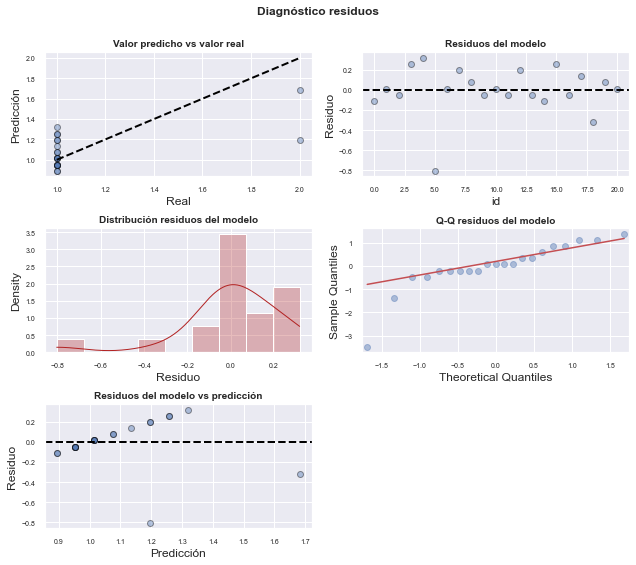


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
13  0.892857  0.079523       0.726414       1.059300      0.357819   
1   1.014286  0.058075       0.892733       1.135838      0.491468   
23  0.953571  0.067321       0.812667       1.094475      0.425919   
5   1.257143  0.071127       1.108272       1.406014      0.727307   

    obs_ci_upper  
13      1.427896  
1       1.537103  
23      1.481224  
5       1.786978  

El error (rmse) de test es: 0.4073125168645789
x_test
    const  HM_PROM
18    1.0     87.0
7     1.0     75.0
4     1.0     84.0
3     1.0     81.0
25    1.0     83.0
2     1.0     85.0

 y_test
[[1]
 [2]
 [2]
 [1]
 [1]
 [1]]



**********************************************************************************************************************


In [37]:
arrFiltrados = dfFilter['Filtrado'].unique()
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]                
                    
                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.60) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                        
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                       
                      
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            print('**********************************************************************************************************************')
                            # División de los datos en train y test
                            # ==============================================================================
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  df_union[arrColumnsUnion].shape[0])
                            print('Variables X:', arrColumnsUnion)
                            print("\n"*2)
                            
                            X = df_union[arrColumnsUnion]
                            y = df_union['Grado']

                            X_train, X_test, y_train, y_test = train_test_split(
                                                                    X,
                                                                    y.values.reshape(-1,1),
                                                                    train_size   = 0.8,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                )
                            # Creación del modelo utilizando matrices como en scikitlearn
                            # ==============================================================================
                            # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
                            X_train = sm.add_constant(X_train, prepend=True)
                            modelo = sm.OLS(endog=y_train, exog=X_train,)
                            modelo = modelo.fit()
                            print(modelo.summary())
                            
                            print('\n Coeficientes')
                            print(modelo.params)
                            
                            # Intervalos de confianza para los coeficientes del modelo
                            # ==============================================================================
                            intervalos_ci = modelo.conf_int(alpha=0.05)
                            intervalos_ci.columns = ['2.5%', '97.5%']
                            
                            print('\nIntervalos de confianza: ')
                            print(intervalos_ci)
                            
                            
                            print('\n Diagnostico de residuos:')
                            # Diagnóstico errores (residuos) de las predicciones de entrenamiento
                            # ==============================================================================
                            y_train = y_train.flatten()
                            prediccion_train = modelo.predict(exog = X_train)
                            residuos_train   = prediccion_train - y_train
                            
                            # Gráficos
                            # ==============================================================================
                            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

                            axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                                            'k--', color = 'black', lw=2)
                            axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
                            axes[0, 0].set_xlabel('Real')
                            axes[0, 0].set_ylabel('Predicción')
                            axes[0, 0].tick_params(labelsize = 7)

                            axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[0, 1].set_xlabel('id')
                            axes[0, 1].set_ylabel('Residuo')
                            axes[0, 1].tick_params(labelsize = 7)

                            sns.histplot(
                                data    = residuos_train,
                                stat    = "density",
                                kde     = True,
                                line_kws= {'linewidth': 1},
                                color   = "firebrick",
                                alpha   = 0.3,
                                ax      = axes[1, 0]
                            )

                            axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                                                 fontweight = "bold")
                            axes[1, 0].set_xlabel("Residuo")
                            axes[1, 0].tick_params(labelsize = 7)


                            sm.qqplot(
                                residuos_train,
                                fit   = True,
                                line  = 'q',
                                ax    = axes[1, 1], 
                                color = 'firebrick',
                                alpha = 0.4,
                                lw    = 2
                            )
                            axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[1, 1].tick_params(labelsize = 7)

                            axes[2, 0].scatter(prediccion_train, residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
                            axes[2, 0].set_xlabel('Predicción')
                            axes[2, 0].set_ylabel('Residuo')
                            axes[2, 0].tick_params(labelsize = 7)

                            # Se eliminan los axes vacíos
                            fig.delaxes(axes[2,1])

                            fig.tight_layout()
                            plt.subplots_adjust(top=0.9)
                            fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
                            plt.show()
                            
                            # Predicciones con intervalo de confianza 
                            # ==============================================================================
                            predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
                            print('\n Predicciones:')
                            print(predicciones.head(4))
                            
                            # Error de test del modelo 
                            # ==============================================================================
                            X_test = sm.add_constant(X_test, prepend=True)
                            predicciones = modelo.predict(exog = X_test)
                            rmse = mean_squared_error(
                                    y_true  = y_test,
                                    y_pred  = predicciones,
                                    squared = False
                                   )
                            print("")
                            print(f"El error (rmse) de test es: {rmse}")
                            
                            print("x_test")
                            print(X_test)
                            print("\n y_test")
                            print(y_test)
                            
                            pickle.dump(modelo, open(filename, 'wb'))
                            
                            print("\n"*2)
                            print('**********************************************************************************************************************')
                            

In [48]:
# Lugar: Filtrado 17 - Turno F17 - Lote 1718
# Plaga:  TRIPS TABACI
# Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
# Número de datos:  26
# Variables X: ['TMP_PROM']
filename = "trips_tabaci.pkl"
arrPlagas = []
dfFilter = dfFilEleg[(dfFilEleg["Plaga"] == "TRIPS TABACI") & (dfFilEleg["Lote"] == "1718")]

**********************************************************************************************************************
Lugar: Filtrado 17 - Turno F17 - Lote 1718
Plaga:  TRIPS TABACI
Caracteristica:  G° NINFAS Y ADULTOS/ INFLORESC.
Número de datos:  26
Variables X: ['TMP_PROM']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     8.952
Date:                Mon, 29 Nov 2021   Prob (F-statistic):            0.00782
Time:                        12:05:44   Log-Likelihood:                -26.573
No. Observations:                  20   AIC:                             57.15
Df Residuals:                      18   BIC:                             59.14
Df Model:                           1                                         
Covaria

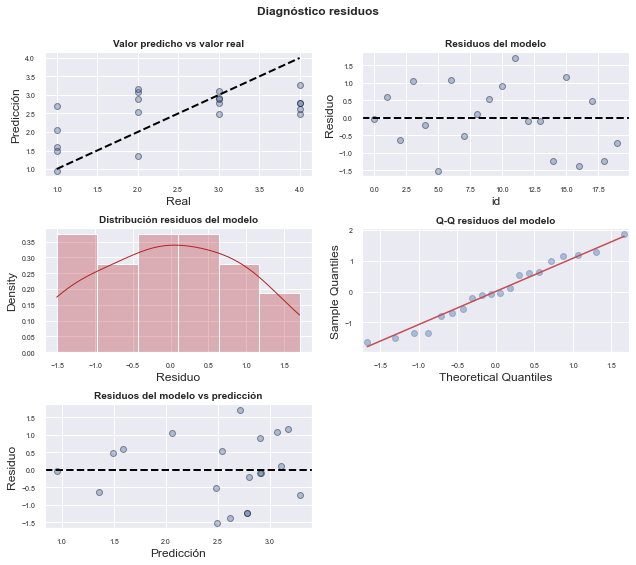


 Predicciones:
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
5  0.954054  0.559775      -0.221989       2.130097     -1.386299   
4  1.585564  0.373879       0.800073       2.371054     -0.584960   
0  1.357754  0.438318       0.436881       2.278627     -0.865348   
8  2.062905  0.260231       1.516180       2.609629     -0.033064   

   obs_ci_upper  
5      3.294407  
4      3.756087  
0      3.580856  
8      4.158873  

El error (rmse) de test es: 0.6486466120792844
x_test
    const   TMP_PROM
7     1.0  21.900000
16    1.0  16.462500
2     1.0  22.941667
3     1.0  22.829167
1     1.0  22.833333
18    1.0  17.241667

 y_test
[[1]
 [4]
 [2]
 [1]
 [2]
 [3]]



**********************************************************************************************************************


In [49]:
arrFiltrados = dfFilter['Filtrado'].unique()
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]                
                    
                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.60) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                        
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                       
                      
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            print('**********************************************************************************************************************')
                            # División de los datos en train y test
                            # ==============================================================================
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  df_union[arrColumnsUnion].shape[0])
                            print('Variables X:', arrColumnsUnion)
                            print("\n"*2)
                            
                            X = df_union[arrColumnsUnion]
                            y = df_union['Grado']

                            X_train, X_test, y_train, y_test = train_test_split(
                                                                    X,
                                                                    y.values.reshape(-1,1),
                                                                    train_size   = 0.8,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                )
                            # Creación del modelo utilizando matrices como en scikitlearn
                            # ==============================================================================
                            # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
                            X_train = sm.add_constant(X_train, prepend=True)
                            modelo = sm.OLS(endog=y_train, exog=X_train,)
                            modelo = modelo.fit()
                            print(modelo.summary())
                            
                            print('\n Coeficientes')
                            print(modelo.params)
                            
                            # Intervalos de confianza para los coeficientes del modelo
                            # ==============================================================================
                            intervalos_ci = modelo.conf_int(alpha=0.05)
                            intervalos_ci.columns = ['2.5%', '97.5%']
                            
                            print('\nIntervalos de confianza: ')
                            print(intervalos_ci)
                            
                            
                            print('\n Diagnostico de residuos:')
                            # Diagnóstico errores (residuos) de las predicciones de entrenamiento
                            # ==============================================================================
                            y_train = y_train.flatten()
                            prediccion_train = modelo.predict(exog = X_train)
                            residuos_train   = prediccion_train - y_train
                            
                            # Gráficos
                            # ==============================================================================
                            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

                            axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                                            'k--', color = 'black', lw=2)
                            axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
                            axes[0, 0].set_xlabel('Real')
                            axes[0, 0].set_ylabel('Predicción')
                            axes[0, 0].tick_params(labelsize = 7)

                            axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[0, 1].set_xlabel('id')
                            axes[0, 1].set_ylabel('Residuo')
                            axes[0, 1].tick_params(labelsize = 7)

                            sns.histplot(
                                data    = residuos_train,
                                stat    = "density",
                                kde     = True,
                                line_kws= {'linewidth': 1},
                                color   = "firebrick",
                                alpha   = 0.3,
                                ax      = axes[1, 0]
                            )

                            axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                                                 fontweight = "bold")
                            axes[1, 0].set_xlabel("Residuo")
                            axes[1, 0].tick_params(labelsize = 7)


                            sm.qqplot(
                                residuos_train,
                                fit   = True,
                                line  = 'q',
                                ax    = axes[1, 1], 
                                color = 'firebrick',
                                alpha = 0.4,
                                lw    = 2
                            )
                            axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[1, 1].tick_params(labelsize = 7)

                            axes[2, 0].scatter(prediccion_train, residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
                            axes[2, 0].set_xlabel('Predicción')
                            axes[2, 0].set_ylabel('Residuo')
                            axes[2, 0].tick_params(labelsize = 7)

                            # Se eliminan los axes vacíos
                            fig.delaxes(axes[2,1])

                            fig.tight_layout()
                            plt.subplots_adjust(top=0.9)
                            fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
                            plt.show()
                            
                            # Predicciones con intervalo de confianza 
                            # ==============================================================================
                            predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
                            print('\n Predicciones:')
                            print(predicciones.head(4))
                            
                            # Error de test del modelo 
                            # ==============================================================================
                            X_test = sm.add_constant(X_test, prepend=True)
                            predicciones = modelo.predict(exog = X_test)
                            rmse = mean_squared_error(
                                    y_true  = y_test,
                                    y_pred  = predicciones,
                                    squared = False
                                   )
                            print("")
                            print(f"El error (rmse) de test es: {rmse}")
                            
                            print("x_test")
                            print(X_test)
                            print("\n y_test")
                            print(y_test)
                            
                            pickle.dump(modelo, open(filename, 'wb'))
                            
                            print("\n"*2)
                            print('**********************************************************************************************************************')
                            

In [50]:
# Lugar: Filtrado 20 - Turno F20 - Lote 2019
# Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
# Caracteristica:  G° INFESTACIÓN (HUEVOS)
# Número de datos:  42
# Variables X: ['TMP_PROM', 'HM_PROM']
filename = "olygonichus_huevos.pkl"
arrPlagas = []
dfFilter = dfFilEleg[(dfFilEleg["Plaga"] == "OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI") & (dfFilEleg["Lote"] == "2019")]

**********************************************************************************************************************
Lugar: Filtrado 20 - Turno F20 - Lote 2019
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
Número de datos:  42
Variables X: ['TMP_PROM', 'HM_PROM']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     15.89
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.96e-05
Time:                        12:09:11   Log-Likelihood:                -28.750
No. Observations:                  33   AIC:                             63.50
Df Residuals:                      30   BIC:                             67.99
Df Model:                           2                 

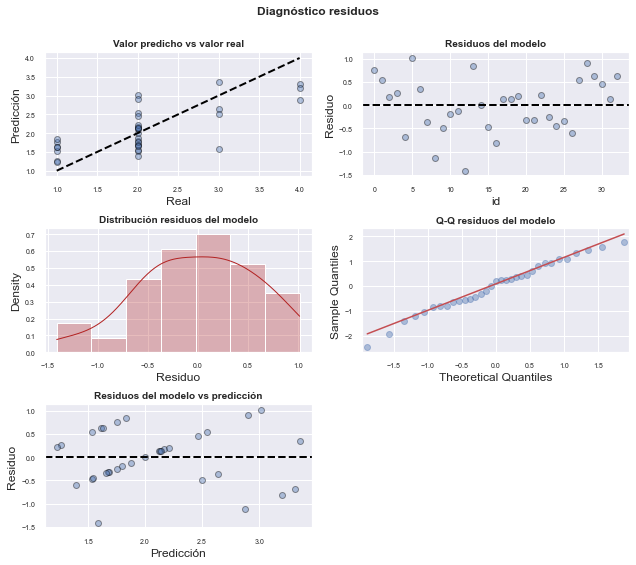


 Predicciones:
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
21  1.759846  0.128255       1.497914       2.021778      0.493842   
13  2.545469  0.168758       2.200819       2.890118      1.259802   
14  2.166052  0.238836       1.678283       2.653821      0.834859   
25  1.265622  0.182598       0.892706       1.638538     -0.027909   

    obs_ci_upper  
21      3.025849  
13      3.831136  
14      3.497245  
25      2.559153  

El error (rmse) de test es: 0.8226545978106988
x_test
    const   TMP_PROM  HM_PROM
10    1.0  23.541667     84.0
41    1.0  18.308333     83.0
8     1.0  24.150000     75.0
17    1.0  19.958333     86.0
36    1.0  17.458333     86.0
1     1.0  22.116667     85.0
4     1.0  22.829167     79.0
20    1.0  17.181250     88.0
29    1.0  15.160417     87.0

 y_test
[[2]
 [2]
 [4]
 [1]
 [2]
 [4]
 [2]
 [1]
 [2]]



**********************************************************************************************************************


In [51]:
arrFiltrados = dfFilter['Filtrado'].unique()
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]                
                    
                    if dfCorrelacion_index.shape[0] > 1 and df_union.shape[0] > 10:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.60) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                        
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                       
                      
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            print('**********************************************************************************************************************')
                            # División de los datos en train y test
                            # ==============================================================================
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  df_union[arrColumnsUnion].shape[0])
                            print('Variables X:', arrColumnsUnion)
                            print("\n"*2)
                            
                            X = df_union[arrColumnsUnion]
                            y = df_union['Grado']

                            X_train, X_test, y_train, y_test = train_test_split(
                                                                    X,
                                                                    y.values.reshape(-1,1),
                                                                    train_size   = 0.8,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                )
                            # Creación del modelo utilizando matrices como en scikitlearn
                            # ==============================================================================
                            # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
                            X_train = sm.add_constant(X_train, prepend=True)
                            modelo = sm.OLS(endog=y_train, exog=X_train,)
                            modelo = modelo.fit()
                            print(modelo.summary())
                            
                            print('\n Coeficientes')
                            print(modelo.params)
                            
                            # Intervalos de confianza para los coeficientes del modelo
                            # ==============================================================================
                            intervalos_ci = modelo.conf_int(alpha=0.05)
                            intervalos_ci.columns = ['2.5%', '97.5%']
                            
                            print('\nIntervalos de confianza: ')
                            print(intervalos_ci)
                            
                            
                            print('\n Diagnostico de residuos:')
                            # Diagnóstico errores (residuos) de las predicciones de entrenamiento
                            # ==============================================================================
                            y_train = y_train.flatten()
                            prediccion_train = modelo.predict(exog = X_train)
                            residuos_train   = prediccion_train - y_train
                            
                            # Gráficos
                            # ==============================================================================
                            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

                            axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                                            'k--', color = 'black', lw=2)
                            axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
                            axes[0, 0].set_xlabel('Real')
                            axes[0, 0].set_ylabel('Predicción')
                            axes[0, 0].tick_params(labelsize = 7)

                            axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[0, 1].set_xlabel('id')
                            axes[0, 1].set_ylabel('Residuo')
                            axes[0, 1].tick_params(labelsize = 7)

                            sns.histplot(
                                data    = residuos_train,
                                stat    = "density",
                                kde     = True,
                                line_kws= {'linewidth': 1},
                                color   = "firebrick",
                                alpha   = 0.3,
                                ax      = axes[1, 0]
                            )

                            axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                                                 fontweight = "bold")
                            axes[1, 0].set_xlabel("Residuo")
                            axes[1, 0].tick_params(labelsize = 7)


                            sm.qqplot(
                                residuos_train,
                                fit   = True,
                                line  = 'q',
                                ax    = axes[1, 1], 
                                color = 'firebrick',
                                alpha = 0.4,
                                lw    = 2
                            )
                            axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
                            axes[1, 1].tick_params(labelsize = 7)

                            axes[2, 0].scatter(prediccion_train, residuos_train,
                                               edgecolors=(0, 0, 0), alpha = 0.4)
                            axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
                            axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
                            axes[2, 0].set_xlabel('Predicción')
                            axes[2, 0].set_ylabel('Residuo')
                            axes[2, 0].tick_params(labelsize = 7)

                            # Se eliminan los axes vacíos
                            fig.delaxes(axes[2,1])

                            fig.tight_layout()
                            plt.subplots_adjust(top=0.9)
                            fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
                            plt.show()
                            
                            # Predicciones con intervalo de confianza 
                            # ==============================================================================
                            predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
                            print('\n Predicciones:')
                            print(predicciones.head(4))
                            
                            # Error de test del modelo 
                            # ==============================================================================
                            X_test = sm.add_constant(X_test, prepend=True)
                            predicciones = modelo.predict(exog = X_test)
                            rmse = mean_squared_error(
                                    y_true  = y_test,
                                    y_pred  = predicciones,
                                    squared = False
                                   )
                            print("")
                            print(f"El error (rmse) de test es: {rmse}")
                            
                            print("x_test")
                            print(X_test)
                            print("\n y_test")
                            print(y_test)
                            
                            pickle.dump(modelo, open(filename, 'wb'))
                            
                            print("\n"*2)
                            print('**********************************************************************************************************************')
                            